# King County Housing Market Model

Mark Prettyman

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

# I. Executive Overview

The usecase for this analysis is for the King County administration to have a model that can predict the price of a home based on the features given. We will be using Single, Multiple, Logistic, Recursive Feature Elimination (RFE), and k Nearest Neighbors (k-NN) to create our model.


The King County Housing authority (KCHA), who is our client, wishes to collaborate with a Home Facilities Management stakeholder to democratize home repair for the entirety of King County. They want to be able to provide plumbing, electrical, mechanical, and carpentry work for all homes in the county, free of charge. 


The county is located in the greater Seattle-Tacoma area. The atmospheric conditions introduce a lot of moisture, not just by rainfall, but with a surprisingly high humidity level that is seems to be constant year round. As building materials are exposed for a greater amount of time and to a greater degree, they degenerate easily, producing unsuitable and at times unsafe living conditions for occupants.


Additional topographical features such as the unevenness of the terrain, combined with heavy rainfall year round, dictate the need for a competent Home Facilities Management stakeholder to respond to these issues, as several conditions and events are causing homes to fall in disrepair.


The Housing Authority proposed the King County administration to levy a tax on the sale price of future homes to fund the program, as well as determine tax brackets for existing homes that accounts for dimensions more than just the sale price.

# II. King County Objectives

In response, the County Board of supervisors welcomed the idea, but challenged the practicality of it, inquiring how they were to fund the program. King County is Washington's largest county, with over 2.2 million residents, and has the highest population density in the state as well, with over 1000 people per square mile. This would, in theory make the maintenance and logistics of a public service quite easier, as Seattle is also a major port, but with inflation and CPI on the rise as it is, the Board of Supervisors are hesistant to modify the Washington State Constitution, which cites:


"Property Tax Limits
The property tax levy is constrained by the overall limits on the regular levy rate and the limit on annual levy increases.

Regular Levy Rate Limits
The Washington State Constitution limits the annual rate of property taxes that may be imposed on an individual parcel of property to 1 percent of its true and fair value. Since tax rates are stated in terms of dollars per 1,000 of value, the 1 percent limit is the same as 10 dollars per 1,000 and is often referred to as the "ten-dollar limit. Taxes imposed under this limit are termed "regular" levies, while those outside the limit are "excess" or "special" levies. 

Assuming..
The assessed value will be equal to the price of the home at the time of the sale.
KC will provide for Assesors who will evaluate homes that may not reflect in this dataset and continue to work with their Real Estate counterparts on the corporate side to gain data on future home sales.

The following chart shows how the 10 dollar limit is allocated. The aggregate limit for cities, counties and most special districts is 5.90 per 1,000 dollars assessed value."

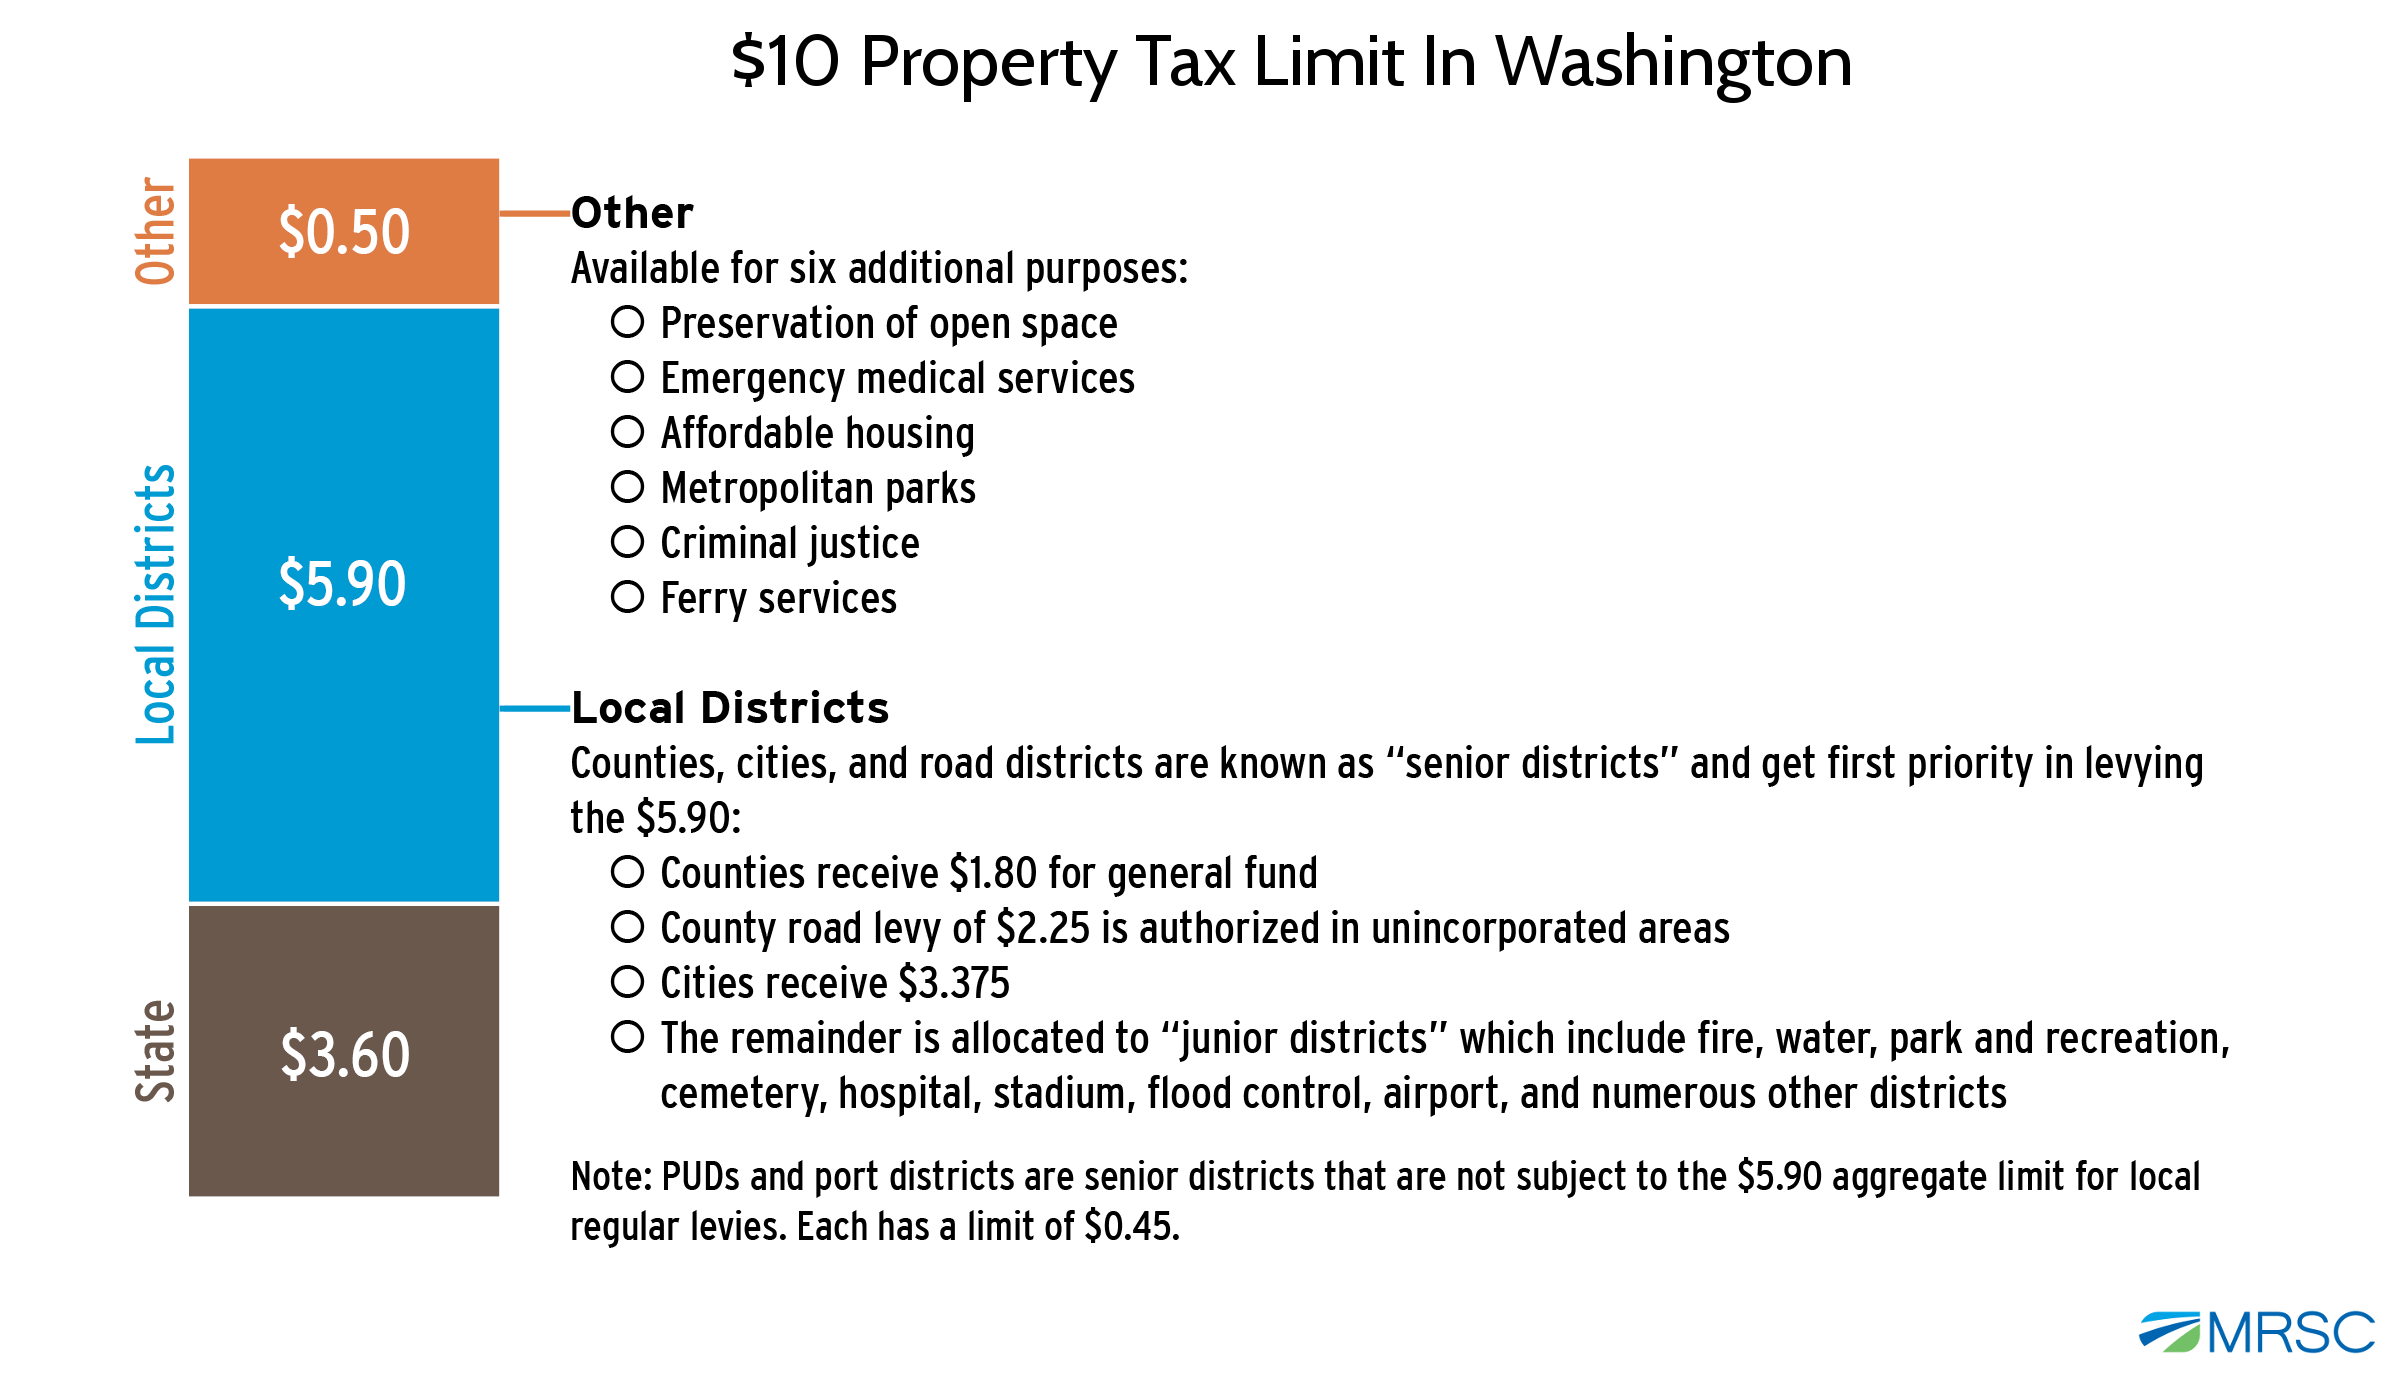

According to the ten dollar limit, the above infographic describes the breakdown of how this money is allocated. Explored later in our EDA, there were 19268 home sales in the affected counties. The mean of home sales last year was 1,030,186. From this, we can infer that King County alone pulled 24,867,659,854 billion dollars in residential property tax revenue.

The Board of Supervisors, in collaboration with the state governement Housing Authority (different entity from the KCHA aforementioned) are in talks to agree to reallocate the funding above to be able to absorb the estimated 10 billion dollar cost for this program. The funds will be used to outsource repair needs to local contractors, who must bid for awarded contracts.

However, before they proceed, they want a better understanding of the homes in the communities this public program will serve. In order to present a stronger case for reallocating the budget severely, they also want to be able to predict a future source of revenue: a sales tax on future home prices, which they calculate, should bridge the gap in allocating the existing 24-25 billion residential property tax revenue.

The Board of Supervisors also noted that such a model would be a powerful tool in helping set up the network for service to existing homes; by combining with exisiting topographical and census data, they want to eventually be able to reduce the overall cost of the program over time as more data is collected or forecasted to develop efficiencies, especailly in the supply chain process.

- KCHA proposed for us to build a model with features that can be used to create a digital survey SmartSheet form, then dispersed to the municipal leadership for assesment.

- KCHA stakeholders understand that the model will not necessarily be a "perfect" predictor of price; the errors and coefficients we observe in our LR Models will attest to how much we can speak on the overall error of the model.

# III. Fundamentals and Assumptions

- For the model we assume that a chosen subset of given predictor variables will represent the home price well.
- We also assume that the sale price of a home is a strong indicator of the homeowner's socioeconmic status and thus, their ability to afford a new tax.
- The model will analyze the coefficients of the given predictor variables and how they affect our repsonse variable, which is the sale price of the home.
- Here are the predictor variables represented in the dataset for each home sale:
    - bedrooms       
    - bathrooms      
    - sqft_living    
    - sqft_lot         
    - floors         
    - waterfront     
    - greenbelt      
    - nuisance       
    - view            
    - condition       
    - grade           
    - heat_source     
    - sewer_system    
    - sqft_above       
    - sqft_basement    
    - sqft_garage      
    - sqft_patio       
    - yr_built         
    - yr_renovated     
    - address         
    - lat            
    - long
- We assume that a specified subset of these predictive features will be able to predict a home price with values given for each.
- The Housing Authority has indicated the equity is important in their mission statement. Therefore, we must conduct EDA to determine not only which combination of variables best represent price, but also how some of these variables' outliers, particularly on the high end.
- In addition to building a model to predict future home prices based on features, we must also include in our report of our findings the explanation of numerical coefficents for the KC administration to analyze, in order to assist with building their model to calculate which homes should fall in which tax bracket.

- In addition, we will be running two ML Algorithms to help strengthen and test our final selection of features against. The findings will be detailed in the **RESULTS/FINDINGS** section of this notebook.

# IV. Data Sourcing

This analysis and iterative modeling presented by Mark Prettyman outlines statistical information from data about all home sales in King County, Washington. The data used is from the King County Housing dataset, which contains records about home sales in that county between 2021-2022. There are 25 features starting with a numerical 'id' feature which contain descriptive characteristics for each property listed in the sale. 

We also use BeautifulSoup to make calls to 'https://washington.hometownlocator.com/zip-codes/countyzips,scfips,53033,c,king.cfm'  a website containing geolocational data for webscraping of additional data that may help us improve our model.

# V.  Variables and Methods

This data set is a DataFrame containing information about the real estate market for homes in King County for the period of time between 2021 and 2022. The DataFrame contains information about each home sale, the time and price at which it was sold, and the general characteristics of each property, some graded in concrete terms like the square footage of living space in the home,  and others in more qualitative terms, like 'view', which describes the quality of the view for the home.

This data will be unpacked, new features will be engineered, and ten features will be selected to conduct Regression Modeling against our continous target variable: 'price'.

## / Loading the Data

Here is the data. The base DataFrame will remain unoperated on. **df**

The only change made to this dataframe will be to set the index to the 'id' column

In [2]:
df = pd.read_csv("./data/kc_house_data.csv")

## / Data Exploration

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   
3  1604601802  12/14/2021  775000.0         3        3.0         2160   
4  8562780790   8/24/2021  592500.0         2        2.0         1120   

   sqft_lot  floors waterfront greenbelt  ... sewer_system sqft_above  \
0      7140     1.0         NO        NO  ...       PUBLIC       1180   
1      6703     1.0         NO        NO  ...       PUBLIC       1570   
2      6156     1.0         NO        NO  ...       PUBLIC       1580   
3      1400     2.0         NO        NO  ...       PUBLIC       1090   
4       758     2.0         NO        NO  ...       PUBLIC       1120   

  sqft_basement sqft_garage sqft_patio yr_built  yr_renovated  \
0             0           0         40     1969             0   
1          1570           0        240     1950             0   
2          1580           0          0     1956             0   
3          1070         200        270     2010             0   
4           550         550         30     2012             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3  4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4  2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  

[5 rows x 25 columns]

In [5]:
df = df.drop(columns='id')
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   5/24/2022  675000.0         4        1.0         1180      7140     1.0   
1  12/13/2021  920000.0         5        2.5         2770      6703     1.0   
2   9/29/2021  311000.0         6        2.0         2880      6156     1.0   
3  12/14/2021  775000.0         3        3.0         2160      1400     2.0   
4   8/24/2021  592500.0         2        2.0         1120       758     2.0   

  waterfront greenbelt nuisance  ... sewer_system sqft_above sqft_basement  \
0         NO        NO       NO  ...       PUBLIC       1180             0   
1         NO        NO      YES  ...       PUBLIC       1570          1570   
2         NO        NO       NO  ...       PUBLIC       1580          1580   
3         NO        NO       NO  ...       PUBLIC       1090          1070   
4         NO        NO      YES  ...       PUBLIC       1120           550   

  sqft_garage sqft_patio  yr_built  yr_renovated  \
0           0         40      1969             0   
1           0        240      1950             0   
2           0          0      1956             0   
3         200        270      2010             0   
4         550         30      2012             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3  4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4  2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  

[5 rows x 24 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30155 non-null  object 
 1   price          30155 non-null  float64
 2   bedrooms       30155 non-null  int64  
 3   bathrooms      30155 non-null  float64
 4   sqft_living    30155 non-null  int64  
 5   sqft_lot       30155 non-null  int64  
 6   floors         30155 non-null  float64
 7   waterfront     30155 non-null  object 
 8   greenbelt      30155 non-null  object 
 9   nuisance       30155 non-null  object 
 10  view           30155 non-null  object 
 11  condition      30155 non-null  object 
 12  grade          30155 non-null  object 
 13  heat_source    30123 non-null  object 
 14  sewer_system   30141 non-null  object 
 15  sqft_above     30155 non-null  int64  
 16  sqft_basement  30155 non-null  int64  
 17  sqft_garage    30155 non-null  int64  
 18  sqft_p

- The above .info function calls a high level overview of the dataset. 
- Here we can see it is arranged as a histogram, with each row representing a home sale. 
- There is data on 30155 home sales, according to this entry. 
- It also describes the columns providing for descriptive characteristics for each home involved in the sale. 

In [7]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  3.015500e+04  30155.000000  30155.000000  30155.000000  3.015500e+04   
mean   1.108536e+06      3.413530      2.334737   2112.424739  1.672360e+04   
std    8.963857e+05      0.981612      0.889556    974.044318  6.038260e+04   
min    2.736000e+04      0.000000      0.000000      3.000000  4.020000e+02   
25%    6.480000e+05      3.000000      2.000000   1420.000000  4.850000e+03   
50%    8.600000e+05      3.000000      2.500000   1920.000000  7.480000e+03   
75%    1.300000e+06      4.000000      3.000000   2619.500000  1.057900e+04   
max    3.075000e+07     13.000000     10.500000  15360.000000  3.253932e+06   

             floors    sqft_above  sqft_basement   sqft_garage    sqft_patio  \
count  30155.000000  30155.000000   30155.000000  30155.000000  30155.000000   
mean       1.543492   1809.826098     476.039396    330.211142    217.412038   
std        0.567717    878.306131     579.631302    285.770536    245.302792   
min        1.000000      2.000000       0.000000      0.000000      0.000000   
25%        1.000000   1180.000000       0.000000      0.000000     40.000000   
50%        1.500000   1560.000000       0.000000    400.000000    150.000000   
75%        2.000000   2270.000000     940.000000    510.000000    320.000000   
max        4.000000  12660.000000    8020.000000   3580.000000   4370.000000   

           yr_built  yr_renovated           lat          long  
count  30155.000000  30155.000000  30155.000000  30155.000000  
mean    1975.163953     90.922301     47.328076   -121.317397  
std       32.067362    416.473038      1.434005      5.725475  
min     1900.000000      0.000000     21.274240   -157.791480  
25%     1953.000000      0.000000     47.405320   -122.326045  
50%     1977.000000      0.000000     47.551380   -122.225585  
75%     2003.000000      0.000000     47.669913   -122.116205  
max     2022.000000   2022.000000     64.824070    -70.074340

- In the above histogram, we observe early statistical data from numerical columns each home sale. 
- Here is where we begin to make our assumptions about which features we will be testing against 'price', our response variable.

## / Missing Values Inspection

<AxesSubplot:>

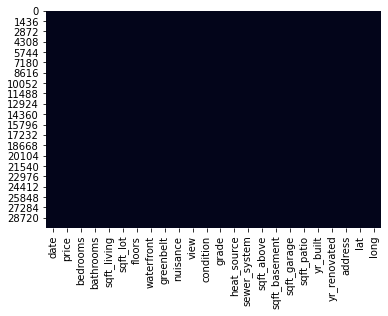

In [8]:
sns.heatmap(df.isnull(), cbar=False)

In [9]:
df.isna().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

- It seems like the amount of missing values detected is but a small fraction of the population of the dataset.
- We will explore to alter/drop these later, but first, we opt to keep them in to examing our response variable.

## / Sale Price

In [10]:
df['price'].describe()

count    3.015500e+04
mean     1.108536e+06
std      8.963857e+05
min      2.736000e+04
25%      6.480000e+05
50%      8.600000e+05
75%      1.300000e+06
max      3.075000e+07
Name: price, dtype: float64

In [11]:
price_value_counts = df['price'].value_counts()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


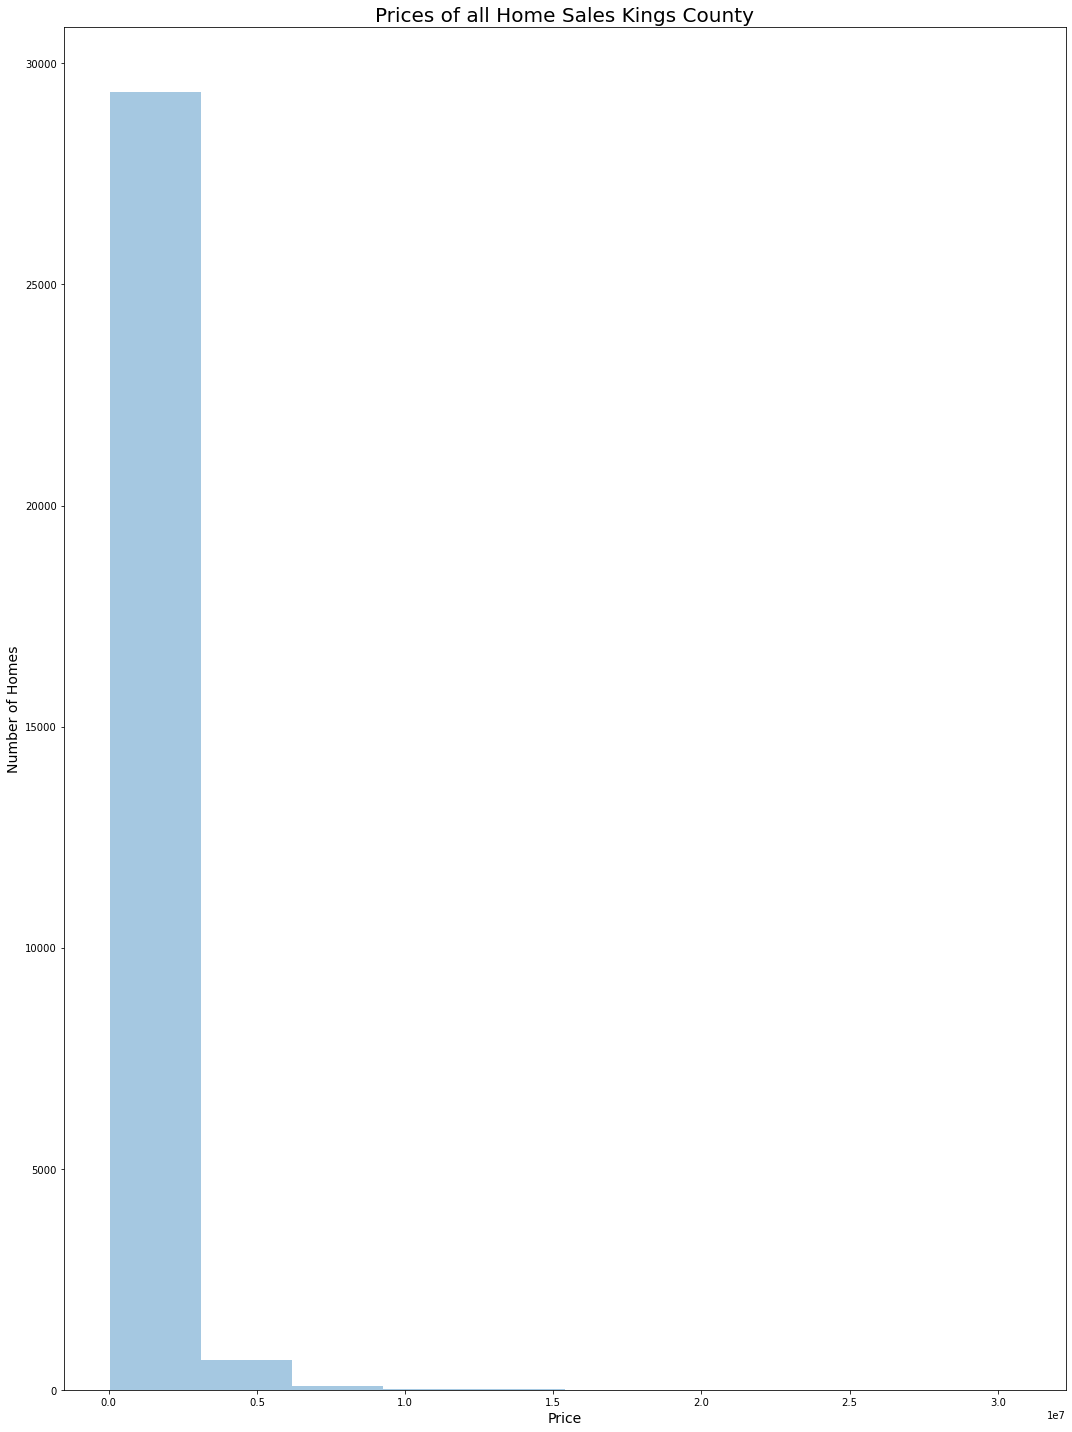

In [12]:
fig, ax = plt.subplots(figsize=(15,20))
sns.distplot(df["price"], bins = 10, kde = False) 
ax.set_title('Prices of all Home Sales King County', fontsize=20)
ax.set_ylabel('Number of Homes', fontsize=14)
ax.set_xlabel('Price', fontsize=14)

fig.tight_layout()

- Let's check where the majority of the data lies:

In [13]:
price_list = df['price'].tolist()

In [14]:
stats.t.interval(alpha=0.95, 
                 df=len(price_list)-1, 
                 loc=np.mean(price_list), 
                 scale=stats.sem(price_list)
                )

(1098418.1621191571, 1118653.5136228427)

- We can be confident that 95% of all home sales in King County cost between 1,098,418 and 1,118,653 dollars.
- To normalize our distribution, we opt to drop all home sales below 350,000 dollars and above 2.75 million dollars.
- Doing this helps improve our model accuracy in estimating home price since the outliers severly skew the regression. For home sales above 2.75 million, these property owners will not be taxed; however, they will not receive the coverage our Home Facilities Maintenance stakeholder provides.

## // **dfv2**

In [15]:
# In this cell, we assign dfv2 to the subselection of home sales within the aforementioned parameters
dfv2 = df[df.price >= 350000]
dfv2 = df[df.price <= 2750000]
dfv2

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0       5/24/2022   675000.0         4        1.0         1180      7140   
1      12/13/2021   920000.0         5        2.5         2770      6703   
2       9/29/2021   311000.0         6        2.0         2880      6156   
3      12/14/2021   775000.0         3        3.0         2160      1400   
4       8/24/2021   592500.0         2        2.0         1120       758   
...           ...        ...       ...        ...          ...       ...   
30150  11/30/2021  1555000.0         5        2.0         1910      4000   
30151   6/16/2021  1313000.0         3        2.0         2020      5800   
30152   5/27/2022   800000.0         3        2.0         1620      3600   
30153   2/24/2022   775000.0         3        2.5         2570      2889   
30154   4/29/2022   500000.0         3        1.5         1200     11058   

       floors waterfront greenbelt nuisance  ... sewer_system sqft_above  \
0         1.0         NO        NO       NO  ...       PUBLIC       1180   
1         1.0         NO        NO      YES  ...       PUBLIC       1570   
2         1.0         NO        NO       NO  ...       PUBLIC       1580   
3         2.0         NO        NO       NO  ...       PUBLIC       1090   
4         2.0         NO        NO      YES  ...       PUBLIC       1120   
...       ...        ...       ...      ...  ...          ...        ...   
30150     1.5         NO        NO       NO  ...       PUBLIC       1600   
30151     2.0         NO        NO       NO  ...       PUBLIC       2020   
30152     1.0         NO        NO      YES  ...       PUBLIC        940   
30153     2.0         NO        NO       NO  ...       PUBLIC       1830   
30154     1.0         NO        NO       NO  ...       PUBLIC       1200   

      sqft_basement sqft_garage sqft_patio  yr_built  yr_renovated  \
0                 0           0         40      1969             0   
1              1570           0        240      1950             0   
2              1580           0          0      1956             0   
3              1070         200        270      2010             0   
4               550         550         30      2012             0   
...             ...         ...        ...       ...           ...   
30150          1130           0        210      1921             0   
30151             0           0        520      2011             0   
30152           920         240        110      1995             0   
30153           740         480        100      2006             0   
30154             0         420          0      1965             0   

                                                 address        lat       long  
0      2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1      11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2      8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3      4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4      2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  
...                                                  ...        ...        ...  
30150  4673 Eastern Avenue North, Seattle, Washington...  47.664740 -122.32940  
30151  4131 44th Avenue Southwest, Seattle, Washingto...  47.565610 -122.38851  
30152  910 Martin Luther King Jr Way, Seattle, Washin...  47.610395 -122.29585  
30153  17127 114th Avenue Southeast, Renton, Washingt...  47.449490 -122.18908  
30154  18615 7th Avenue South, Burien, Washington 981...  47.435840 -122.32634  

[29039 rows x 24 columns]

- Since we are considering scalability in our analysis, we want to focus on the majority of the data.
- This new version of the DataFrame, **dfv2**, will have excluded the all sales below 350,000 dollars and above 2,500,000 dollars.
- The administration should consider a minimum threshold for sales price, and continue to incorporate the homes sold lower than this price

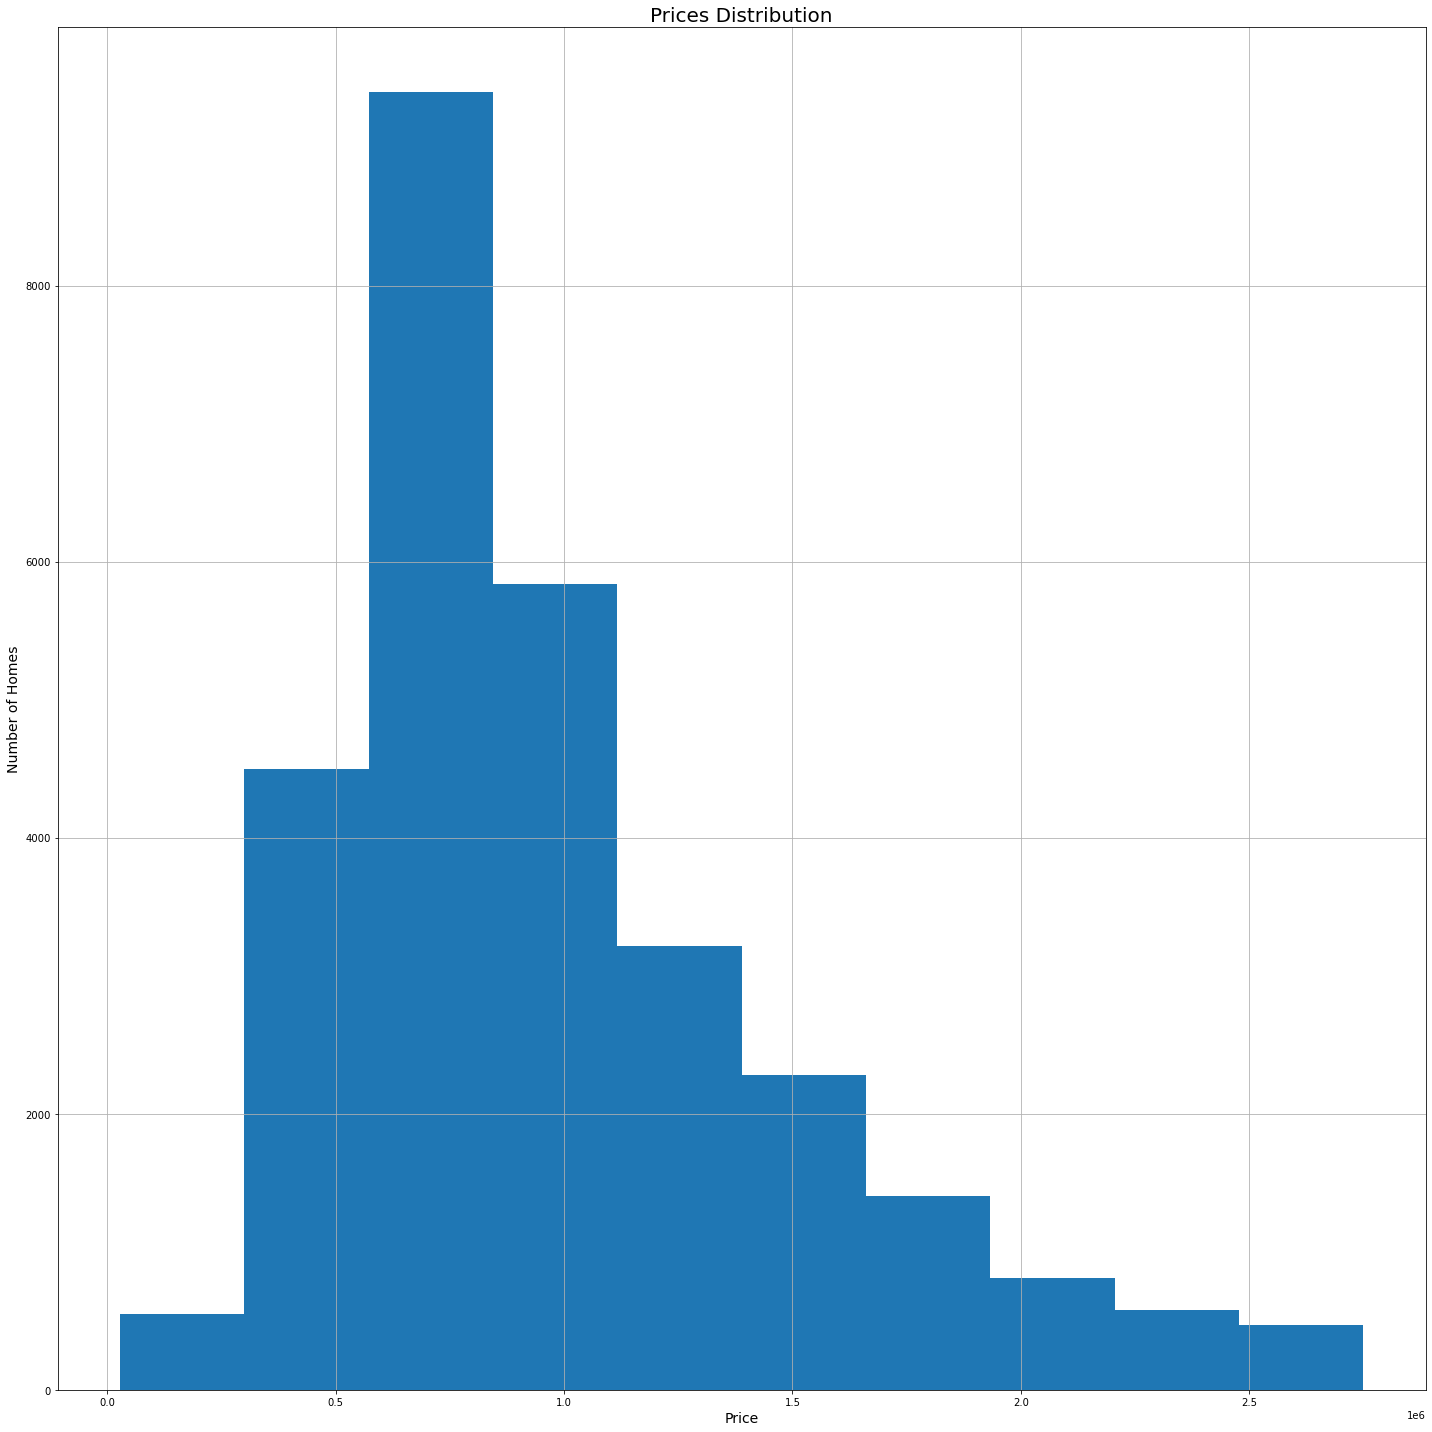

In [16]:
fig, ax = plt.subplots(figsize=(15,20))
dfv2['price'].hist(figsize=[20,20], bins=10)
ax.set_title('Prices Distribution', fontsize=20)
ax.set_ylabel('Number of Homes', fontsize=14)
ax.set_xlabel('Price', fontsize=14)

fig.tight_layout()

In [17]:
# Early statistical summary of 'price'
dfv2['price'].describe()

count    2.903900e+04
mean     9.884988e+05
std      5.046078e+05
min      2.736000e+04
25%      6.380000e+05
50%      8.495000e+05
75%      1.240000e+06
max      2.750000e+06
Name: price, dtype: float64

We want to explore the main body of home sales in order to reach a target audience.

In [18]:
# Exploring Covariance
dfv2.cov()['price'].sort_values(ascending=False)

price            2.546290e+11
sqft_lot         2.323112e+09
sqft_living      2.584629e+08
sqft_above       2.055221e+08
sqft_basement    5.982363e+07
sqft_garage      3.666540e+07
sqft_patio       3.122121e+07
yr_renovated     1.298220e+07
yr_built         1.502000e+06
bathrooms        1.933083e+05
bedrooms         1.633892e+05
lat              6.127747e+04
floors           5.921236e+04
long            -8.591258e+04
Name: price, dtype: float64

In [19]:
# Exploring Correlation
dfv2.corr()['price'].abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.607421
sqft_above       0.522328
bathrooms        0.467192
bedrooms         0.335965
sqft_patio       0.267037
sqft_garage      0.263307
sqft_basement    0.215126
floors           0.206886
yr_built         0.093152
lat              0.083874
sqft_lot         0.079278
yr_renovated     0.063681
long             0.029500
Name: price, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price v Square Feet Lot')

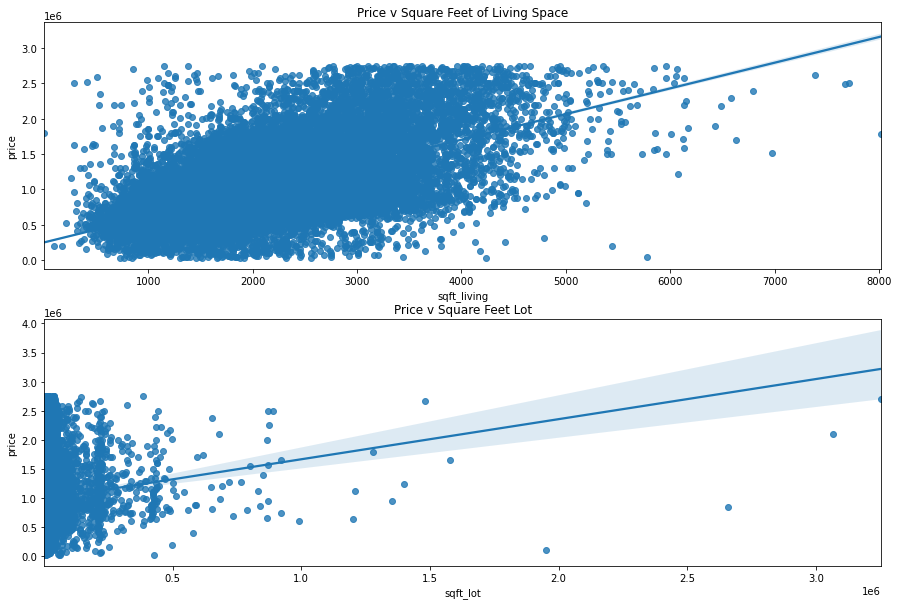

In [20]:
fig, ax = plt.subplots(figsize=(15,10), nrows=2)
sns.regplot(dfv2['sqft_living'], dfv2['price'], ax=ax[0])
sns.regplot(dfv2['sqft_lot'], dfv2['price'], ax=ax[1])
ax[0].set_title('Price v Square Feet of Living Space')
ax[1].set_title('Price v Square Feet Lot')

- Our early investigation of metrics with our numerical predictors reveals a positive correlation for a majority of the square footage dimensions of the home.

# / Baseline Model

Here we create an initial baseline model using the most strongly correlated numerical value so far: Square Feet of Living.

In [21]:
dfv2['sqft_living'].shape

(29039,)

In [22]:
dfv2['sqft_living'].describe()

count    29039.000000
mean      2032.795723
std        843.246460
min          3.000000
25%       1400.000000
50%       1890.000000
75%       2530.000000
max       8020.000000
Name: sqft_living, dtype: float64

In [23]:
dfv2['sqft_living'].isna().sum()

0

In [24]:
# Checked the shape, descriptive summary statistics, 
# and whether or not the feature contains rows presenting missing values.
# Now we can assign a variable that describes the mean of Square Foot Living Space.

sqft_living_mean = dfv2['sqft_living'].mean()

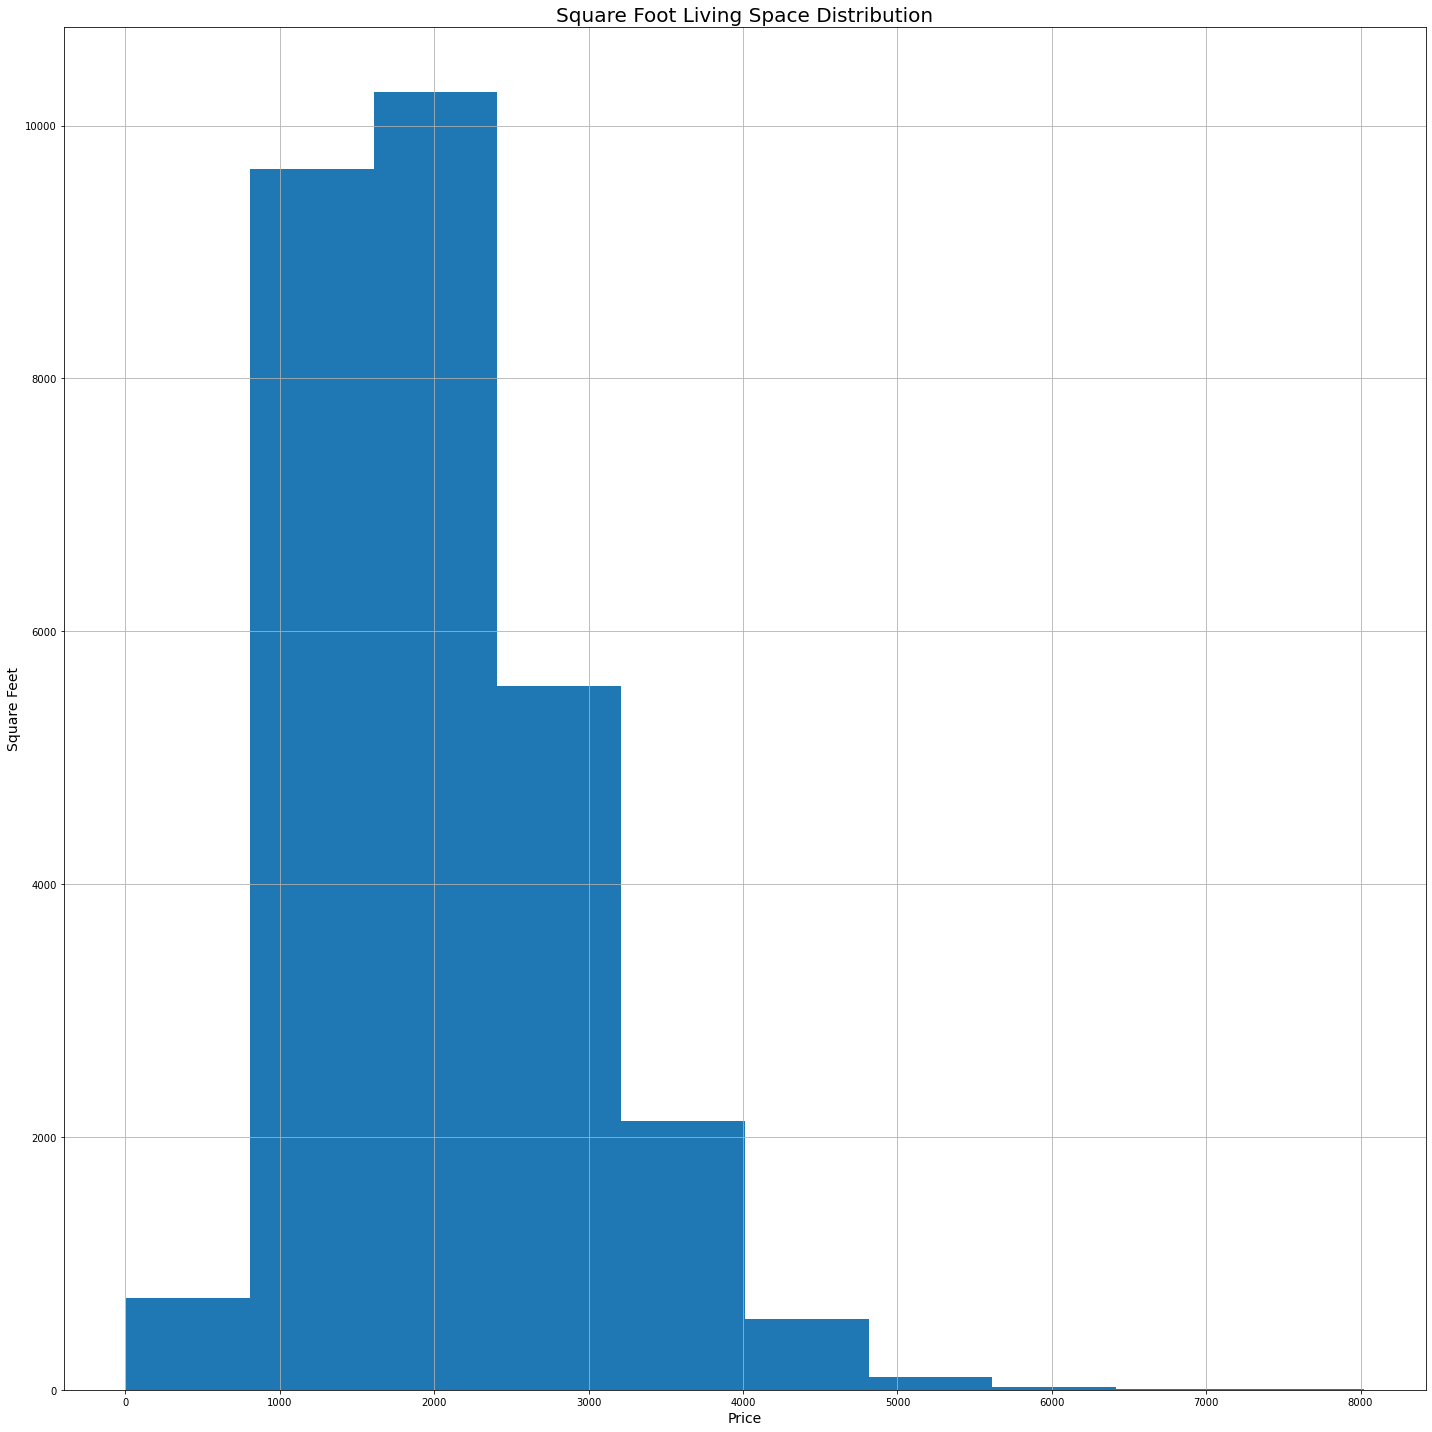

In [25]:
# Examine Feature
fig, ax = plt.subplots(figsize=(15,20))
dfv2['sqft_living'].hist(figsize=[20,20], bins=10)
ax.set_title('Square Foot Living Space Distribution', fontsize=20)
ax.set_ylabel('Square Feet', fontsize=14)
ax.set_xlabel('Price', fontsize=14)

fig.tight_layout()

In [26]:
# Variable Assignment
Y_baseline = dfv2['price']
X_baseline = dfv2[['sqft_living']]

In [27]:
# Loading in statsmodels package
import statsmodels.api as sm

In [28]:
# Baseline Model
baseline_model = sm.OLS(Y_baseline, sm.add_constant(X_baseline))

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
# Now we fit the model to our data
baseline_results = baseline_model.fit()

In [30]:
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                 1.698e+04
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:25:40   Log-Likelihood:            -4.1585e+05
No. Observations:               29039   AIC:                         8.317e+05
Df Residuals:                   29037   BIC:                         8.317e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.496e+05   6139.351     40.656      0.000    2.38e+05    2.62e+05
sqft_living   363.4873      2.790    130.298      0.000     358.019     368.955
==============================================================================
Omnibus:                     2771.452   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4641.715
Skew:                           0.690   Prob(JB):                         0.00
Kurtosis:                       4.391   Cond. No.                     5.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
r2_baseline = baseline_results.rsquared

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


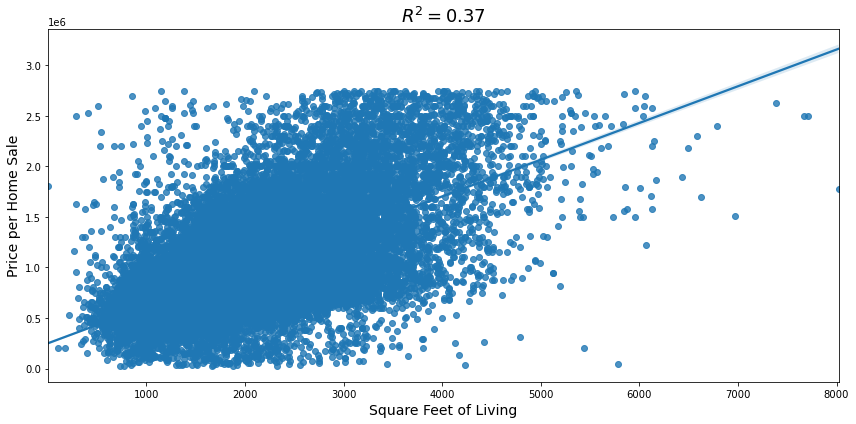

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(dfv2['sqft_living'], dfv2['price'])
ax.set_ylabel('Price per Home Sale', fontsize=14)
ax.set_xlabel('Square Feet of Living', fontsize=14)
ax.set_title('$R^2= %.2f$' % r2_baseline, fontsize=18)

fig.tight_layout()

- Here we deduce that for (roughly) every increase in square feet of living space, there is a $363 increase in the price of the home. (From the **coef** column)

- R² is 0.369. A good start! Next, we will explore other home features. Later, we will group subsets of these features to model against price and examine results.

- Strong multi-collinearity suggested. Lets check for this using a heatmap.

## / Exploring Multicollinearity

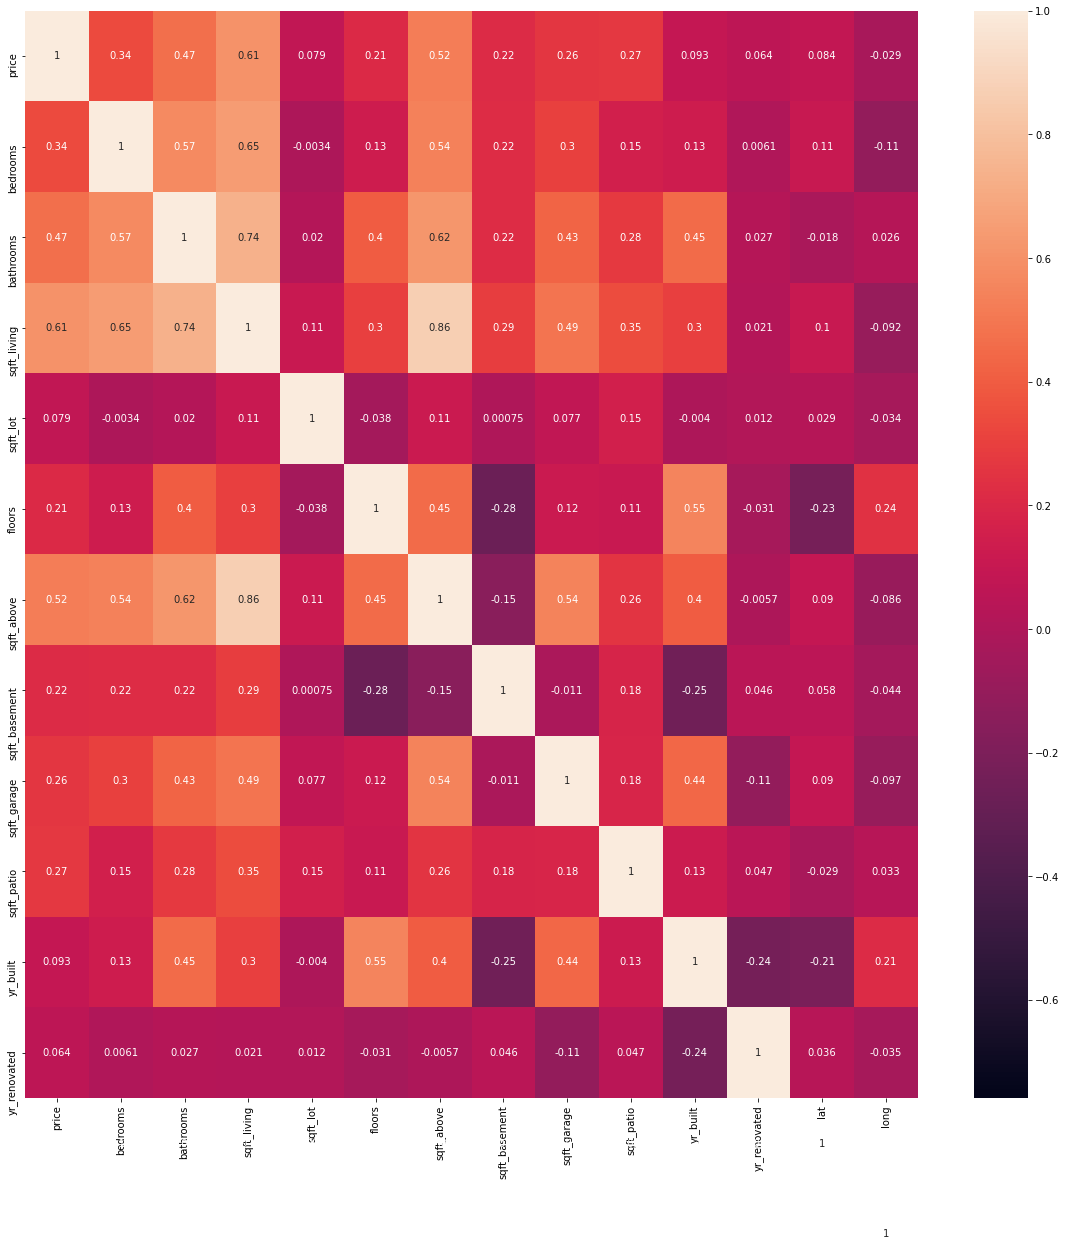

In [33]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(dfv2.corr(), annot=True)

ax.set_ylim(12, 0)
plt.show()

- Here, we observe multicollinearity of square feet living against other features; specifically the square foot above feature, which entails the space of the home excluding the garage.
- Other features describing the number of spaces in the home (bedrooms, bathrooms), strongly correlate to square feet of living as well.
- It sounds obvious, but here we express the relationship between these features mathematically.
- We will consider this effect as we add dimensions in future models.

## // Final Check of Null Values

In [34]:
dfv2['heat_source'].isna().sum()

32

In [35]:
dfv2['heat_source'].value_counts()

Gas                  19648
Electricity           6341
Oil                   2852
Gas/Solar               85
Electricity/Solar       58
Other                   19
Oil/Solar                4
Name: heat_source, dtype: int64

In [36]:
dfv2['sewer_system'].isna().sum()

12

In [37]:
dfv2['sewer_system'].value_counts()

PUBLIC                24805
PRIVATE                4213
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

- Since this analysis usecase will be for modeling and investigation of the scale of the population to guide a Home Facilities Management stakeholder decisions, and the homes that do not represent a value for the given dimensions, which represents only a very small fraction of the population of home sales, we opt to drop the rows where there are missing values present for the features 'heat_source' and 'sewer_system'. 

- We will be using .dropna on the entire df since those are our only missing values so far.

In [38]:
dfv2 = dfv2.dropna()

## // Early inspection of correlation between numeric values

Now, we will revisit all our numerical columns

In [39]:
X = dfv2.drop(columns=['date', 'price', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system', 'address'], axis=1)
Y = dfv2['price']

In [40]:
df_numerical = pd.concat([X, Y], axis=1)

In [41]:
#sns.pairplot(df_numerical)
#plt.show()

The Pearson's R correlation coeffficient:

In [42]:
df_numerical.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.607848
sqft_above       0.522598
bathrooms        0.467288
bedrooms         0.335965
sqft_patio       0.267552
sqft_garage      0.262851
sqft_basement    0.214902
floors           0.207129
yr_built         0.093063
lat              0.083622
sqft_lot         0.080057
yr_renovated     0.063847
long            -0.029182
Name: price, dtype: float64

Then, in a DataFrame type object:

In [43]:
df_numerical.corr()

bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms       1.000000   0.569529     0.644921 -0.000262  0.129012   
bathrooms      0.569529   1.000000     0.735634  0.022803  0.401742   
sqft_living    0.644921   0.735634     1.000000  0.110262  0.296653   
sqft_lot      -0.000262   0.022803     0.110262  1.000000 -0.037336   
floors         0.129012   0.401742     0.296653 -0.037336  1.000000   
sqft_above     0.535304   0.620505     0.862667  0.117689  0.454425   
sqft_basement  0.220104   0.218401     0.287496  0.001052 -0.276148   
sqft_garage    0.300645   0.428015     0.489120  0.079320  0.120047   
sqft_patio     0.149547   0.278061     0.347866  0.151344  0.112653   
yr_built       0.133179   0.454272     0.297042 -0.003832  0.552820   
yr_renovated   0.007265   0.028461     0.021175  0.010958 -0.030208   
lat            0.107089  -0.018406     0.102814  0.029131 -0.226642   
long          -0.107125   0.026267    -0.092447 -0.034576  0.240250   
price          0.335965   0.467288     0.607848  0.080057  0.207129   

               sqft_above  sqft_basement  sqft_garage  sqft_patio  yr_built  \
bedrooms         0.535304       0.220104     0.300645    0.149547  0.133179   
bathrooms        0.620505       0.218401     0.428015    0.278061  0.454272   
sqft_living      0.862667       0.287496     0.489120    0.347866  0.297042   
sqft_lot         0.117689       0.001052     0.079320    0.151344 -0.003832   
floors           0.454425      -0.276148     0.120047    0.112653  0.552820   
sqft_above       1.000000      -0.154731     0.540872    0.258308  0.399798   
sqft_basement   -0.154731       1.000000    -0.011840    0.178654 -0.254980   
sqft_garage      0.540872      -0.011840     1.000000    0.183208  0.443785   
sqft_patio       0.258308       0.178654     0.183208    1.000000  0.125307   
yr_built         0.399798      -0.254980     0.443785    0.125307  1.000000   
yr_renovated    -0.005260       0.046096    -0.107023    0.046911 -0.235705   
lat              0.090281       0.058279     0.089848   -0.029341 -0.213919   
long            -0.085855      -0.043670    -0.096769    0.032934  0.214751   
price            0.522598       0.214902     0.262851    0.267552  0.093063   

               yr_renovated       lat      long     price  
bedrooms           0.007265  0.107089 -0.107125  0.335965  
bathrooms          0.028461 -0.018406  0.026267  0.467288  
sqft_living        0.021175  0.102814 -0.092447  0.607848  
sqft_lot           0.010958  0.029131 -0.034576  0.080057  
floors            -0.030208 -0.226642  0.240250  0.207129  
sqft_above        -0.005260  0.090281 -0.085855  0.522598  
sqft_basement      0.046096  0.058279 -0.043670  0.214902  
sqft_garage       -0.107023  0.089848 -0.096769  0.262851  
sqft_patio         0.046911 -0.029341  0.032934  0.267552  
yr_built          -0.235705 -0.213919  0.214751  0.093063  
yr_renovated       1.000000  0.035787 -0.034814  0.063847  
lat                0.035787  1.000000 -0.758107  0.083622  
long              -0.034814 -0.758107  1.000000 -0.029182  
price              0.063847  0.083622 -0.029182  1.000000

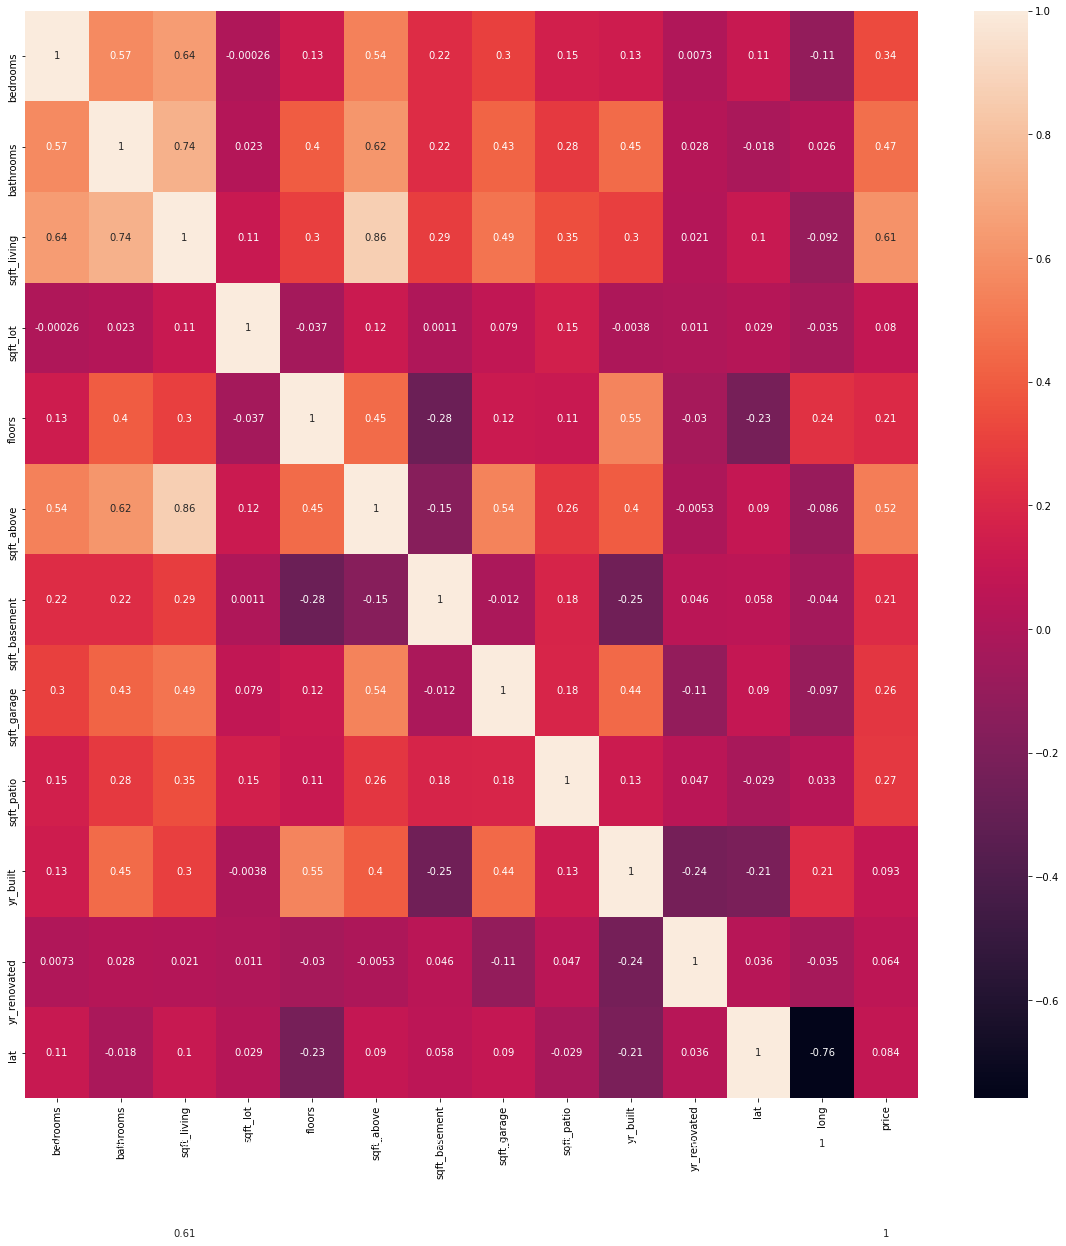

In [44]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(df_numerical.corr(), annot=True)

ax.set_ylim(12, 0)
plt.show()

In the above heat map, we examine a visual representation to the degree with which these variables are correlated. The lighter the shade, the more correlated.

## / CONCLUSION

- The Pearson R Coefficient yields that the total square footage of living space is the most strongly correlated with home price.
- The square foot living column, which measures the area of living space in the house, seems to be correlated with many features such as bedrooms, square footage above the basement, and also seems to have a strong correlation to home price.
- Explorations of correlations reveal that a home's square foot metrics for different space categories of the lot reveal that these set of metrics affect price in comparison to other dimensions.

We then turn to the other object type features next in our investigation.

## / Further Cleaning

- We have taken out all existing rows with missing values so far in the DataFrame.
- Next we continue to prepare the data for modeling.

In [45]:
dfv2

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0       5/24/2022   675000.0         4        1.0         1180      7140   
1      12/13/2021   920000.0         5        2.5         2770      6703   
2       9/29/2021   311000.0         6        2.0         2880      6156   
3      12/14/2021   775000.0         3        3.0         2160      1400   
4       8/24/2021   592500.0         2        2.0         1120       758   
...           ...        ...       ...        ...          ...       ...   
30150  11/30/2021  1555000.0         5        2.0         1910      4000   
30151   6/16/2021  1313000.0         3        2.0         2020      5800   
30152   5/27/2022   800000.0         3        2.0         1620      3600   
30153   2/24/2022   775000.0         3        2.5         2570      2889   
30154   4/29/2022   500000.0         3        1.5         1200     11058   

       floors waterfront greenbelt nuisance  ... sewer_system sqft_above  \
0         1.0         NO        NO       NO  ...       PUBLIC       1180   
1         1.0         NO        NO      YES  ...       PUBLIC       1570   
2         1.0         NO        NO       NO  ...       PUBLIC       1580   
3         2.0         NO        NO       NO  ...       PUBLIC       1090   
4         2.0         NO        NO      YES  ...       PUBLIC       1120   
...       ...        ...       ...      ...  ...          ...        ...   
30150     1.5         NO        NO       NO  ...       PUBLIC       1600   
30151     2.0         NO        NO       NO  ...       PUBLIC       2020   
30152     1.0         NO        NO      YES  ...       PUBLIC        940   
30153     2.0         NO        NO       NO  ...       PUBLIC       1830   
30154     1.0         NO        NO       NO  ...       PUBLIC       1200   

      sqft_basement sqft_garage sqft_patio  yr_built  yr_renovated  \
0                 0           0         40      1969             0   
1              1570           0        240      1950             0   
2              1580           0          0      1956             0   
3              1070         200        270      2010             0   
4               550         550         30      2012             0   
...             ...         ...        ...       ...           ...   
30150          1130           0        210      1921             0   
30151             0           0        520      2011             0   
30152           920         240        110      1995             0   
30153           740         480        100      2006             0   
30154             0         420          0      1965             0   

                                                 address        lat       long  
0      2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1      11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2      8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3      4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4      2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188  
...                                                  ...        ...        ...  
30150  4673 Eastern Avenue North, Seattle, Washington...  47.664740 -122.32940  
30151  4131 44th Avenue Southwest, Seattle, Washingto...  47.565610 -122.38851  
30152  910 Martin Luther King Jr Way, Seattle, Washin...  47.610395 -122.29585  
30153  17127 114th Avenue Southeast, Renton, Washingt...  47.449490 -122.18908  
30154  18615 7th Avenue South, Burien, Washington 981...  47.435840 -122.32634  

[28997 rows x 24 columns]

In [46]:
dfv2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28997 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           28997 non-null  object 
 1   price          28997 non-null  float64
 2   bedrooms       28997 non-null  int64  
 3   bathrooms      28997 non-null  float64
 4   sqft_living    28997 non-null  int64  
 5   sqft_lot       28997 non-null  int64  
 6   floors         28997 non-null  float64
 7   waterfront     28997 non-null  object 
 8   greenbelt      28997 non-null  object 
 9   nuisance       28997 non-null  object 
 10  view           28997 non-null  object 
 11  condition      28997 non-null  object 
 12  grade          28997 non-null  object 
 13  heat_source    28997 non-null  object 
 14  sewer_system   28997 non-null  object 
 15  sqft_above     28997 non-null  int64  
 16  sqft_basement  28997 non-null  int64  
 17  sqft_garage    28997 non-null  int64  
 18  sqft_p

In [47]:
dfv2.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
address           object
lat              float64
long             float64
dtype: object

## // DateTime fucntion on Date

In [48]:
pd.to_datetime(dfv2['date'])

0       2022-05-24
1       2021-12-13
2       2021-09-29
3       2021-12-14
4       2021-08-24
           ...    
30150   2021-11-30
30151   2021-06-16
30152   2022-05-27
30153   2022-02-24
30154   2022-04-29
Name: date, Length: 28997, dtype: datetime64[ns]

In [49]:
dfv2['sell_year'] = pd.DatetimeIndex(dfv2['date']).year

/tmp/ipykernel_64/2959303159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv2['sell_year'] = pd.DatetimeIndex(dfv2['date']).year


In [50]:
dfv2['sell_year']

0        2022
1        2021
2        2021
3        2021
4        2021
         ... 
30150    2021
30151    2021
30152    2022
30153    2022
30154    2022
Name: sell_year, Length: 28997, dtype: int64

## // Feature Engineering: 'age' feature

- Here, we will gather the age by subtracting the year the house was built from the year it was sold.

In [51]:
dfv2['age'] = dfv2['sell_year'] - dfv2['yr_built']

/tmp/ipykernel_64/1463642910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv2['age'] = dfv2['sell_year'] - dfv2['yr_built']


In [52]:
dfv2['age'].unique()

array([ 53,  71,  65,  11,   9,  73,  70,   3,  33,  10, 110,  46,   0,
         6,  16,  78,  15,   1, 111,  32,  80,  74,  29, 116,  57,   5,
        61,  36,  35,  14,  72,  41,  55,  93,  52,  62,  88,  66,  54,
        63,  64,  12,  60,  23,  59, 121,  58,  37,  56,  -1,  21, 120,
        44,  27, 109,  17,  98,  85, 108, 113,  19,  96,   2,  75,  13,
        22,  49,  76,  34,  45,  31,  51,   4,   8, 114,  47,  38,  24,
        81, 107,  26,  83,  42, 106,  50, 102,  94,   7,  67,  40, 112,
        20, 104,  79,  77,  30,  39,  43,  95,  97,  28, 117,  68, 101,
        92, 103,  91,  18, 100,  99,  69, 119, 122,  84,  25,  48,  89,
       118,  86,  87,  82,  90, 105, 115])

## // Feature Engineering: 'city' column engineered; addresses not in King County filtered out using webscraped data 

- Please note: For the saved final notebook, cells 54-56 will not be showing output.
- The query returns a massive chunk of HTML code which is not necessarily directly relevant, yet takes up a massive portion of the notebook when run.

In [53]:
resp = requests.get('https://washington.hometownlocator.com/zip-codes/countyzips,scfips,53033,c,king.cfm')
resp.status_code

200

In [54]:
soup = BeautifulSoup(resp.content)
soup

<!DOCTYPE html>
<html><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<script data-cfasync="false" data-ezscrex="false" data-pagespeed-no-defer="">var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=true;__ez.queue=function(){var e=0,i=0,t=[],n=!1,s=[],r=[],o=!0,a=function(e,i,n,s,r,o,a){var l=this;this.name=e,this.funcName=i,this.parameters=null===n?null:n instanceof Array?n:[n],this.isBlock=s,this.blockedBy=r,this.deleteWhenComplete=o,this.isError=!1,this.isComplete=!1,this.isInitialized=!1,this.proceedIfError=a,this.isTimeDelay=!1,this.process=function(){u("... func = "+e),l.isInitialized=!0,l.isComplete=!0,u("... func.apply: "+e);var i=l.funcName.split("."),n=null;i.length>3||(n=3===i.length?window[i[0]][i[1]][i[2]]:2===i.length?window[i[0]][i[1]]:window[l.funcName]),null!=n&&n.apply(null,this.parameters),!0===l.deleteWhenComplete&&delete t[e],!0===l.isBlock&&(u("----- F'D: "+l.name),

In [55]:
soup.find_all('body')


[<body>
 <div id="mainheader">
 <div class="headercontainer" id="header">
 <div class="headerinner">
 <div class="headerleft">
 <a href="/"><img alt="Washington Community and City Profiles: HomeTownLocator.com" border="0" height="46" src="/images/gazetteerlogo.png" width="280"/></a>
 </div>
 <div class="headercenter">
 <span>Washington Gazetteer</span>
 </div>
 <div class="headerright">
 <div class="search">
 <form action="/search/site/" id="cse-search-box" method="get" name="SearchForm">
 <div class="searchinput">
 <input id="MNSearchBox" maxlength="64" name="q" type="text" value="Search Washington Gazetteer"/>
 <input name="cx" type="hidden" value="partner-pub-8212312372325442:2434890510"/>
 <input name="cof" type="hidden" value="FORID:10"/>
 <input name="ie" type="hidden" value="UTF-8"/>
 </div>
 <div class="searchbutton"></div>
 </form>
 <div style="clear:both;"></div>
 </div>
 </div>
 <div style="clear:both;"></div>
 </div>
 </div>
 <div class="navcontainer" id="navcontainer">
 <d

In [56]:
a_tags = soup.find('div', class_='bodycontainer').find_all('a')
a_tags[-57:-27]

[<a href="/zip-codes/zipcodes,city,auburn.cfm">Auburn</a>,
 <a href="/zip-codes/zipcodes,city,baring.cfm">Baring</a>,
 <a href="/zip-codes/zipcodes,city,bellevue.cfm">Bellevue</a>,
 <a href="/zip-codes/zipcodes,city,black diamond.cfm">Black Diamond</a>,
 <a href="/zip-codes/zipcodes,city,bothell.cfm">Bothell</a>,
 <a href="/zip-codes/zipcodes,city,burton.cfm">Burton</a>,
 <a href="/zip-codes/zipcodes,city,carnation.cfm">Carnation</a>,
 <a href="/zip-codes/zipcodes,city,duvall.cfm">Duvall</a>,
 <a href="/zip-codes/zipcodes,city,enumclaw.cfm">Enumclaw</a>,
 <a href="/zip-codes/zipcodes,city,fall city.cfm">Fall City</a>,
 <a href="/zip-codes/zipcodes,city,federal way.cfm">Federal Way</a>,
 <a href="/zip-codes/zipcodes,city,hobart.cfm">Hobart</a>,
 <a href="/zip-codes/zipcodes,city,issaquah.cfm">Issaquah</a>,
 <a href="/zip-codes/zipcodes,city,kenmore.cfm">Kenmore</a>,
 <a href="/zip-codes/zipcodes,city,kent.cfm">Kent</a>,
 <a href="/zip-codes/zipcodes,city,kirkland.cfm">Kirkland</a>,
 <a 

In [57]:
city_names = [a.text for a in a_tags[-57:-25]]

In [58]:
zip_codes = [a.text for a in a_tags [8:131]]

In [59]:
zip_codes

['98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98047',
 '98051',
 '98052',
 '98053',
 '98055',
 '98056',
 '98057',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98101',
 '98102',
 '98103',
 '98104',
 '98105',
 '98106',
 '98107',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98121',
 '98122',
 '98125',
 '98126',
 '98131',
 '98133',
 '98134',
 '98136',
 '98144',
 '98146',
 '98148',
 '98154',
 '98155',
 '98158',
 '98161',
 '98164',
 '98166',
 '98168',
 '98174',
 '98177',
 '98178',
 '98188',
 '98198',
 '98199',
 '98251',
 '98354',
 '98422',
 '98009',
 '98013',
 '98015',
 '98025',
 '98035',
 '98041',
 '98050',
 '98062',
 '98063',
 '98064',
 '98068',
 '98071',
 '98073',
 '98083',
 '98089',


In [60]:
dfv2['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 28997, dtype: object

In [61]:
dfv2['address'].iloc[0].split(', ')[1]

'Renton'

In [62]:
dfv2['city'] = dfv2['address'].apply(lambda x: x.split(', ')[1])

/tmp/ipykernel_64/1162475067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv2['city'] = dfv2['address'].apply(lambda x: x.split(', ')[1])


## // Feature Engineering: 'zip_code' column creation and integration with data on addresses webscraped from data gathered online website API

In [63]:
dfv2['address'].iloc[0].split(', ')[2].split()[1]

'98055'

In [64]:
dfv2['zip_code'] = dfv2['address'].apply(lambda x: 
                                         x.split(', ')[2]
                                         .split()[-1]
                                        )

/tmp/ipykernel_64/1204098175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv2['zip_code'] = dfv2['address'].apply(lambda x:


## / **dfv3**

- In the below line of code, we filter out zipcodes and cities from **dfv2** that do not belong in the webscraped King County Data, and save those changes to the next version of our DataFrame, **dfv3**.

In [65]:
dfv2 = dfv2.loc[dfv2['zip_code'].isin(zip_codes)]
dfv3 = dfv2.loc[dfv2['city'].isin(city_names)]
dfv3['address'].loc[5:10]

7     24913 122nd Place Southeast, Kent, Washington ...
8     2721 Southwest 343rd Place, Federal Way, Washi...
9     27950 Northeast 147th Circle, Duvall, Washingt...
10    3408 Beacon Avenue South, Seattle, Washington ...
Name: address, dtype: object

## / Categorical Feature Preprocessing

- Below, we use OneHotEncoder from the SciKit Learn package to encode the city variable so we may run a regression analysis on it later.
- We also analyze and encode the remaining categorical features in preparation for the modeling stage.

In [66]:
# Assigning ohe
ohe = OneHotEncoder(drop="first", sparse=False)

In [67]:
df_cityohe = dfv3[["city"]].copy()
df_cityohe

city
0        Renton
1       Seattle
2       Seattle
3       Seattle
4      Issaquah
...         ...
30149   Seattle
30150   Seattle
30151   Seattle
30152   Seattle
30153    Renton

[24139 rows x 1 columns]

In [68]:
ohe.fit(df_cityohe)
ohe.transform(df_cityohe)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
df_city_enc = pd.DataFrame(data=ohe.transform(df_cityohe),
                    columns=[f"city_{cat}" 
                             for cat in ohe.categories_[0][1:]]
                   )
df_city_enc

city_Baring  city_Bellevue  city_Black Diamond  city_Bothell  \
0              0.0            0.0                 0.0           0.0   
1              0.0            0.0                 0.0           0.0   
2              0.0            0.0                 0.0           0.0   
3              0.0            0.0                 0.0           0.0   
4              0.0            0.0                 0.0           0.0   
...            ...            ...                 ...           ...   
24134          0.0            0.0                 0.0           0.0   
24135          0.0            0.0                 0.0           0.0   
24136          0.0            0.0                 0.0           0.0   
24137          0.0            0.0                 0.0           0.0   
24138          0.0            0.0                 0.0           0.0   

       city_Carnation  city_Duvall  city_Enumclaw  city_Fall City  \
0                 0.0          0.0            0.0             0.0   
1                 0.0          0.0            0.0             0.0   
2                 0.0          0.0            0.0             0.0   
3                 0.0          0.0            0.0             0.0   
4                 0.0          0.0            0.0             0.0   
...               ...          ...            ...             ...   
24134             0.0          0.0            0.0             0.0   
24135             0.0          0.0            0.0             0.0   
24136             0.0          0.0            0.0             0.0   
24137             0.0          0.0            0.0             0.0   
24138             0.0          0.0            0.0             0.0   

       city_Federal Way  city_Hobart  ...  city_Preston  city_Ravensdale  \
0                   0.0          0.0  ...           0.0              0.0   
1                   0.0          0.0  ...           0.0              0.0   
2                   0.0          0.0  ...           0.0              0.0   
3                   0.0          0.0  ...           0.0              0.0   
4                   0.0          0.0  ...           0.0              0.0   
...                 ...          ...  ...           ...              ...   
24134               0.0          0.0  ...           0.0              0.0   
24135               0.0          0.0  ...           0.0              0.0   
24136               0.0          0.0  ...           0.0              0.0   
24137               0.0          0.0  ...           0.0              0.0   
24138               0.0          0.0  ...           0.0              0.0   

       city_Redmond  city_Renton  city_Sammamish  city_Seattle  \
0               0.0          1.0             0.0           0.0   
1               0.0          0.0             0.0           1.0   
2               0.0          0.0             0.0           1.0   
3               0.0          0.0             0.0           1.0   
4               0.0          0.0             0.0           0.0   
...             ...          ...             ...           ...   
24134           0.0          0.0             0.0           1.0   
24135           0.0          0.0             0.0           1.0   
24136           0.0          0.0             0.0           1.0   
24137           0.0          0.0             0.0           1.0   
24138           0.0          1.0             0.0           0.0   

       city_Skykomish  city_Snoqualmie  city_Vashon  city_Woodinville  
0                 0.0              0.0          0.0               0.0  
1                 0.0              0.0          0.0               0.0  
2                 0.0              0.0          0.0               0.0  
3                 0.0              0.0          0.0               0.0  
4                 0.0              0.0          0.0               0.0  
...               ...              ...          ...               ...  
24134             0.0              0.0          0.0               0.0  
24135             0.0              0.0     

In [70]:
df_city_enc = df_city_enc.reset_index()
df_city_enc

index  city_Baring  city_Bellevue  city_Black Diamond  city_Bothell  \
0          0          0.0            0.0                 0.0           0.0   
1          1          0.0            0.0                 0.0           0.0   
2          2          0.0            0.0                 0.0           0.0   
3          3          0.0            0.0                 0.0           0.0   
4          4          0.0            0.0                 0.0           0.0   
...      ...          ...            ...                 ...           ...   
24134  24134          0.0            0.0                 0.0           0.0   
24135  24135          0.0            0.0                 0.0           0.0   
24136  24136          0.0            0.0                 0.0           0.0   
24137  24137          0.0            0.0                 0.0           0.0   
24138  24138          0.0            0.0                 0.0           0.0   

       city_Carnation  city_Duvall  city_Enumclaw  city_Fall City  \
0                 0.0          0.0            0.0             0.0   
1                 0.0          0.0            0.0             0.0   
2                 0.0          0.0            0.0             0.0   
3                 0.0          0.0            0.0             0.0   
4                 0.0          0.0            0.0             0.0   
...               ...          ...            ...             ...   
24134             0.0          0.0            0.0             0.0   
24135             0.0          0.0            0.0             0.0   
24136             0.0          0.0            0.0             0.0   
24137             0.0          0.0            0.0             0.0   
24138             0.0          0.0            0.0             0.0   

       city_Federal Way  ...  city_Preston  city_Ravensdale  city_Redmond  \
0                   0.0  ...           0.0              0.0           0.0   
1                   0.0  ...           0.0              0.0           0.0   
2                   0.0  ...           0.0              0.0           0.0   
3                   0.0  ...           0.0              0.0           0.0   
4                   0.0  ...           0.0              0.0           0.0   
...                 ...  ...           ...              ...           ...   
24134               0.0  ...           0.0              0.0           0.0   
24135               0.0  ...           0.0              0.0           0.0   
24136               0.0  ...           0.0              0.0           0.0   
24137               0.0  ...           0.0              0.0           0.0   
24138               0.0  ...           0.0              0.0           0.0   

       city_Renton  city_Sammamish  city_Seattle  city_Skykomish  \
0              1.0             0.0           0.0             0.0   
1              0.0             0.0           1.0             0.0   
2              0.0             0.0           1.0             0.0   
3              0.0             0.0           1.0             0.0   
4              0.0             0.0           0.0             0.0   
...            ...             ...           ...             ...   
24134          0.0             0.0           1.0             0.0   
24135          0.0             0.0           1.0             0.0   
24136          0.0             0.0           1.0             0.0   
24137          0.0             0.0           1.0             0.0   
24138          1.0             0.0           0.0             0.0   

       city_Snoqualmie  city_Vashon  city_Woodinville  
0                  0.0          0.0               0.0  
1                  0.0          0.0               0.0  
2                  0.0          0.0               0.0  
3                  0.0          0.0               0.0  
4                  0.0          0.0               0.0  
...                ...          ...               ...  
24134              0.0          0.0               0.0  
24135              0.0          0.0               0

In [71]:
categoricals = dfv3.select_dtypes("object")

for col in categoricals:
    print(dfv3[col].value_counts(), "\n")

6/23/2021     155
7/1/2021      155
8/23/2021     148
6/10/2021     148
6/16/2021     142
             ... 
1/16/2022       1
12/5/2021       1
12/26/2021      1
7/4/2021        1
2/6/2022        1
Name: date, Length: 363, dtype: int64 

NO     23841
YES      298
Name: waterfront, dtype: int64 

NO     23488
YES      651
Name: greenbelt, dtype: int64 

NO     20058
YES     4081
Name: nuisance, dtype: int64 

NONE         21496
AVERAGE       1537
GOOD           658
EXCELLENT      291
FAIR           157
Name: view, dtype: int64 

Average      14451
Good          6753
Very Good     2694
Fair           189
Poor            52
Name: condition, dtype: int64 

7 Average        9601
8 Good           7796
9 Better         3099
6 Low Average    2180
10 Very Good      927
5 Fair            308
11 Excellent      158
4 Low              36
12 Luxury          24
3 Poor              8
13 Mansion          1
2 Substandard       1
Name: grade, dtype: int64 

Gas                  16751
Electricity         

## // Categorical Exploration

The 'waterfront' column describes whether the house is on a waterfront.

In [72]:
dfv3['waterfront'].value_counts()

NO     23841
YES      298
Name: waterfront, dtype: int64

The 'greenbelt' column whether the house is adjacent to a green belt.

In [73]:
dfv3['greenbelt'].value_counts()

NO     23488
YES      651
Name: greenbelt, dtype: int64

The 'nuisance' column describes whether the house has traffic noise or other recorded nuisances.

In [74]:
dfv3['nuisance'].value_counts()

NO     20058
YES     4081
Name: nuisance, dtype: int64

The 'view' column describes the quality of the view from the house.

In [75]:
dfv3['view'].value_counts()

NONE         21496
AVERAGE       1537
GOOD           658
EXCELLENT      291
FAIR           157
Name: view, dtype: int64

The 'condition' column assesses good the overall condition of the house is. 
Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code

In [76]:
dfv3['condition'].value_counts()

Average      14451
Good          6753
Very Good     2694
Fair           189
Poor            52
Name: condition, dtype: int64

The 'grade' column describes overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code

In [77]:
dfv3['grade'].value_counts()

7 Average        9601
8 Good           7796
9 Better         3099
6 Low Average    2180
10 Very Good      927
5 Fair            308
11 Excellent      158
4 Low              36
12 Luxury          24
3 Poor              8
13 Mansion          1
2 Substandard       1
Name: grade, dtype: int64

Here we present the 'heat_source' and 'sewer_system' columns, describing the heat and sweage systems for the house.

In [78]:
dfv3['heat_source'].value_counts()

Gas                  16751
Electricity           4982
Oil                   2262
Gas/Solar               73
Electricity/Solar       51
Other                   18
Oil/Solar                2
Name: heat_source, dtype: int64

In [79]:
df['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

We then build a function to encode these categorical values for regression analysis.

In [80]:
df_waterfrontohe = dfv3[["waterfront"]].copy()
df_greenbeltohe = dfv3[["greenbelt"]].copy()
df_nuisanceohe = dfv3[["nuisance"]].copy()
df_viewohe = dfv3[["view"]].copy()
df_conditionohe = dfv3[["condition"]].copy()
df_gradeohe = dfv3[["grade"]].copy()
df_heat_sourceohe = dfv3[["heat_source"]].copy()
df_sewer_systemohe = dfv3[["sewer_system"]].copy()
df_floorsohe = dfv3[["floors"]].copy()
df_cityohe = dfv3[["city"]].copy()

In [81]:
dfv3.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.413900e+04  24139.000000  24139.000000  24139.000000  2.413900e+04   
mean   1.030186e+06      3.402916      2.300551   2068.820912  1.713367e+04   
std    5.153430e+05      0.962406      0.818233    848.982183  6.271729e+04   
min    2.756300e+04      0.000000      0.000000      3.000000  4.020000e+02   
25%    6.600000e+05      3.000000      2.000000   1440.000000  4.752000e+03   
50%    8.850000e+05      3.000000      2.500000   1920.000000  7.223000e+03   
75%    1.300000e+06      4.000000      2.500000   2570.000000  1.025450e+04   
max    2.750000e+06     11.000000      7.500000   8020.000000  3.253932e+06   

             floors    sqft_above  sqft_basement   sqft_garage    sqft_patio  \
count  24139.000000  24139.000000   24139.000000  24139.000000  24139.000000   
mean       1.531981   1776.545466     469.698745    327.556610    209.357596   
std        0.555082    790.083127     553.035254    277.971005    235.109946   
min        1.000000      2.000000       0.000000      0.000000      0.000000   
25%        1.000000   1190.000000       0.000000      0.000000     40.000000   
50%        1.500000   1570.000000       0.000000    400.000000    140.000000   
75%        2.000000   2240.000000     940.000000    510.000000    300.000000   
max        4.000000   6630.000000    3910.000000   3580.000000   4370.000000   

           yr_built  yr_renovated           lat          long     sell_year  \
count  24139.000000  24139.000000  24139.000000  24139.000000  24139.000000   
mean    1973.839554     88.751564     47.546948   -122.204672   2021.355400   
std       32.347715    411.719360      0.143521      0.149538      0.478644   
min     1900.000000      0.000000     47.159700   -122.526650   2021.000000   
25%     1952.000000      0.000000     47.447040   -122.328660   2021.000000   
50%     1977.000000      0.000000     47.565525   -122.213270   2021.000000   
75%     2001.000000      0.000000     47.672470   -122.116030   2022.000000   
max     2022.000000   2022.000000     47.789830   -121.163960   2022.000000   

                age  
count  24139.000000  
mean      47.515846  
std       32.366285  
min       -1.000000  
25%       20.000000  
50%       44.000000  
75%       70.000000  
max      122.000000

- The above describe() function calls a high level overview reflecting cleaned statistics from each dimension in the dataset.
- We can observe the means, standard deviations, and the distribution of the data numerically represented.

## / Feature Encoding 

In [82]:
# Assigning encoder
encoder = OrdinalEncoder()

In [83]:
# First fit for Binary Classifications
df_waterfrontohe = encoder.fit_transform(df_waterfrontohe)
df_greenbeltohe = encoder.fit_transform(df_greenbeltohe)
df_nuisanceohe = encoder.fit_transform(df_nuisanceohe)

# First Fit for other Categoricals
df_viewohe = pd.get_dummies(df_viewohe, columns=['view'])
df_conditionohe = pd.get_dummies(df_conditionohe, columns=['condition'])
df_gradeohe = pd.get_dummies(df_gradeohe, columns=['grade'])
df_heat_sourceohe = pd.get_dummies(df_heat_sourceohe, columns=['heat_source'])
df_sewer_systemohe = pd.get_dummies(df_sewer_systemohe, columns=['sewer_system'])
df_floorsohe = pd.get_dummies(df_floorsohe, columns=['floors'])
df_cityohe = pd.get_dummies(df_cityohe, columns=['city'])

In [84]:
# Preparing encoded categorical DataFrames
df_waterfront_enc = pd.DataFrame(data=df_waterfrontohe,
                                 columns=['waterfront_YES']
                                )
df_greenbelt_enc = pd.DataFrame(data=(df_greenbeltohe),
                                columns=['greenbelt_YES']
                               )
df_nuisance_enc = pd.DataFrame(data=(df_nuisanceohe),
                               columns=['nuisance_YES']
                              )
df_condition_enc = pd.DataFrame(data=df_conditionohe,
                               columns=['condition_Poor', 
                                        'condition_Fair', 
                                        'condition_Average', 
                                        'condition_Good', 
                                        'condition_Very Good'
                                       ]
                              )
df_view_enc = pd.DataFrame(data=df_viewohe,
                           columns=['view_NONE', 
                                    'view_FAIR', 
                                    'view_AVERAGE', 
                                    'view_GOOD', 
                                    'view_EXCELLENT'
                                   ]
                          ) 
df_grade_enc = pd.DataFrame(data=df_gradeohe,
                            columns=['grade_2 Substandard', 
                                     'grade_3 Poor', 
                                     'grade_4 Low', 
                                     'grade_5 Fair',
                                     'grade_6 Low Average', 
                                     'grade_7 Average', 
                                     'grade_8 Good', 
                                     'grade_9 Better', 
                                     'grade_10 Very Good',
                                     'grade_11 Excellent', 
                                     'grade_12 Luxury', 
                                     'grade_13 Mansion' 
                                    ]
                            )  
df_heat_source_enc = pd.DataFrame(data=df_heat_sourceohe,
                                  columns=['heat_source_Other', 
                                           'heat_source_Oil', 
                                           'heat_source_Oil/Solar', 
                                           'heat_source_Gas',
                                           'heat_source_Gas/Solar', 
                                           'heat_source_Electricity', 
                                           'heat_source_Electricity/Solar'
                                          ] 
                                  )
df_sewer_system_enc = pd.DataFrame(data=df_sewer_systemohe,
                                   columns=['sewer_system_PUBLIC RESTRICTED', 
                                            'sewer_system_PUBLIC', 
                                            'sewer_system_PRIVATE',
                                            'sewer_system_PRIVATE RESTRICTED'
                                           ]
                                   )
df_floors_enc = pd.DataFrame(data=df_floorsohe,
                             columns=['floors_1.0', 
                                      'floors_1.5', 
                                      'floors_2.0',
                                      'floors_2.5',
                                      'floors_3.0',
                                      'floors_3.5',
                                      'floors_4.0'
                                     ]
                            )
df_city_enc = pd.DataFrame(data=df_cityohe,
                           columns=['city_Auburn',
                                    'city_Baring',
                                    'city_Bellevue',
                                    'city_Black Diamond',
                                    'city_Bothell',
                                    'city_Carnation',
                                    'city_Duvall',
                                    'city_Enumclaw',
                                    'city_Fall City',
                                    'city_Preston',
                                    'city_Ravensdale',
                                    'city_Redmond',
                                    'city_Renton',
                                    'city_Sammamish',
                                    'city_Seattle',
                                    'city_Skykomish',
                                    'city_Snoqualmie',
                                    'city_Vashon',
                                    'city_Woodinville',
                                     ]
                            )

In [85]:
# Stage 1 Concatenation
df_cat = pd.concat([df_waterfront_enc, 
                    df_greenbelt_enc, 
                    df_condition_enc, 
                    df_view_enc, 
                    df_grade_enc, 
                    df_sewer_system_enc, 
                    df_condition_enc, 
                    df_heat_source_enc,
                    df_sewer_system_enc,
                    df_floors_enc,
                    df_city_enc
                   ], join='inner', axis=1
                  )

In [86]:
# Stage 2 Concatenation
df_modeling = pd.concat([dfv3, df_cat], axis=1)
df_modeling = df_modeling.select_dtypes(exclude=['object'])
df_modeling

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       675000.0         4        1.0         1180      7140     1.0   
1       920000.0         5        2.5         2770      6703     1.0   
2       311000.0         6        2.0         2880      6156     1.0   
3       775000.0         3        3.0         2160      1400     2.0   
4       592500.0         2        2.0         1120       758     2.0   
...          ...       ...        ...          ...       ...     ...   
30149   719000.0         3        2.5         1270      1141     2.0   
30150  1555000.0         5        2.0         1910      4000     1.5   
30151  1313000.0         3        2.0         2020      5800     2.0   
30152   800000.0         3        2.0         1620      3600     1.0   
30153   775000.0         3        2.5         2570      2889     2.0   

       sqft_above  sqft_basement  sqft_garage  sqft_patio  ...  city_Preston  \
0            1180              0            0          40  ...           0.0   
1            1570           1570            0         240  ...           0.0   
2            1580           1580            0           0  ...           0.0   
3            1090           1070          200         270  ...           0.0   
4            1120            550          550          30  ...           0.0   
...           ...            ...          ...         ...  ...           ...   
30149        1050            420          200          60  ...           NaN   
30150        1600           1130            0         210  ...           NaN   
30151        2020              0            0         520  ...           NaN   
30152         940            920          240         110  ...           NaN   
30153        1830            740          480         100  ...           NaN   

       city_Ravensdale  city_Redmond  city_Renton  city_Sammamish  \
0                  0.0           0.0          1.0             0.0   
1                  0.0           0.0          0.0             0.0   
2                  0.0           0.0          0.0             0.0   
3                  0.0           0.0          0.0             0.0   
4                  0.0           0.0          0.0             0.0   
...                ...           ...          ...             ...   
30149              NaN           NaN          NaN             NaN   
30150              NaN           NaN          NaN             NaN   
30151              NaN           NaN          NaN             NaN   
30152              NaN           NaN          NaN             NaN   
30153              NaN           NaN          NaN             NaN   

       city_Seattle  city_Skykomish  city_Snoqualmie  city_Vashon  \
0               0.0             0.0              0.0          0.0   
1               1.0             0.0              0.0          0.0   
2               1.0             0.0              0.0          0.0   
3               1.0             0.0              0.0          0.0   
4               0.0             0.0              0.0          0.0   
...             ...             ...              ...          ...   
30149           NaN             NaN              NaN          NaN   
30150           NaN             NaN              NaN          NaN   
30151           NaN             NaN              NaN          NaN   
30152           NaN             NaN              NaN          NaN   
30153           NaN             NaN              NaN          NaN   

       city_Woodinville  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
...                 ...  
30149               NaN  
30150               NaN  
30151               NaN  
30152               NaN  
30153               NaN  

[24139 rows x 86 columns]

In [87]:
# Removing duplicate columns that appeared
df_modeling = df_modeling.loc[:,~df_modeling.columns.duplicated()].copy()
df_modeling.iloc[0: , 0]

0         675000.0
1         920000.0
2         311000.0
3         775000.0
4         592500.0
           ...    
30149     719000.0
30150    1555000.0
30151    1313000.0
30152     800000.0
30153     775000.0
Name: price, Length: 24139, dtype: float64

<AxesSubplot:>

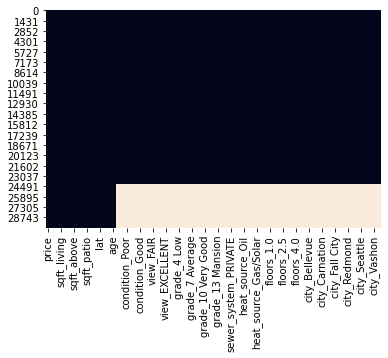

In [88]:
# Check Null
sns.heatmap(df_modeling.isnull(), cbar=False)

- The explanation behind the null values for thisinstance of the DataFrame is that when we filtered out zip_codes from dfv2 - dfv3, we lost data from the home sales outside these zipcodes, but through concatenation with dfv3, some returned.
- A quick fix to remove these home sales which will not be relevant in our analysis is to use .dropna on the entire DataFrame.

In [89]:
df_modeling.dropna(axis=0, inplace=True)

<AxesSubplot:>

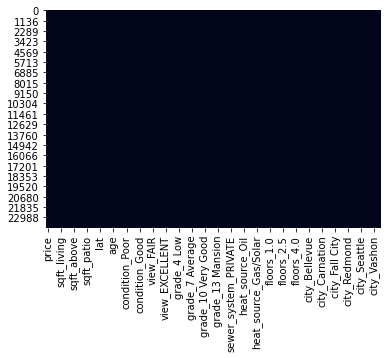

In [90]:
sns.heatmap(df_modeling.isnull(), cbar=False)

In [91]:
df_modeling.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
                   ..
city_Seattle        0
city_Skykomish      0
city_Snoqualmie     0
city_Vashon         0
city_Woodinville    0
Length: 77, dtype: int64

- Now that we have our combined DataFrame with categorical values encoded, and all missing values accounted for, we begin our iterative modeling process using subsets of feature, using **df_modeling**.

# VI. Modeling

## / Setting up VIF & Tolerance Functions

In [92]:
def VIF(r2=float):
    print(1 / (1-r2))

In [93]:
def tolerance(r2=float):
    print(1 - r2)

## / Model 1

- Our first model will incorporate the square footage of both available indoor living space, and total lot space.

In [94]:
# Model 1

# Variable Assignment
Y1 = df_modeling['price']
X1 = df_modeling[
                 ['sqft_living',
                  'sqft_lot',
                 ]
                ]

In [95]:
model_1 = sm.OLS(Y1, sm.add_constant(X1)).fit()
results_1 = model_1.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [96]:
results_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     5686.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:25:52   Log-Likelihood:            -2.7629e+05
No. Observations:               19268   AIC:                         5.526e+05
Df Residuals:                   19265   BIC:                         5.526e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.651e+05   7751.397     34.199      0.000     2.5e+05     2.8e+05
sqft_living   368.4696      3.480    105.877      0.000     361.648     375.291
sqft_lot        0.0923      0.047      1.964      0.050       0.000       0.184
==============================================================================
Omnibus:                     1358.792   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2090.948
Skew:                           0.571   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                     1.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
# Assigning r2
r2_model1 = model_1.rsquared

In [98]:
# Checking VIF
VIF(r2=r2_model1)

1.5903178266277715


- Here we observe a VIF not indicative of multicollinearity.

In [99]:
# Prep for 3D Visualization

X = X1.values.reshape(-1,2)

x = X[:, 0]
y = X[:, 1]
z = Y1

x_pred = np.linspace(3, 15360, 10)      # range of square foot living space values
y_pred = np.linspace(0, 13, 10)  # range of square foot lot values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Training the model

ols = linear_model.LinearRegression()
model = ols.fit(X, Y1)
predicted = model.predict(model_viz)

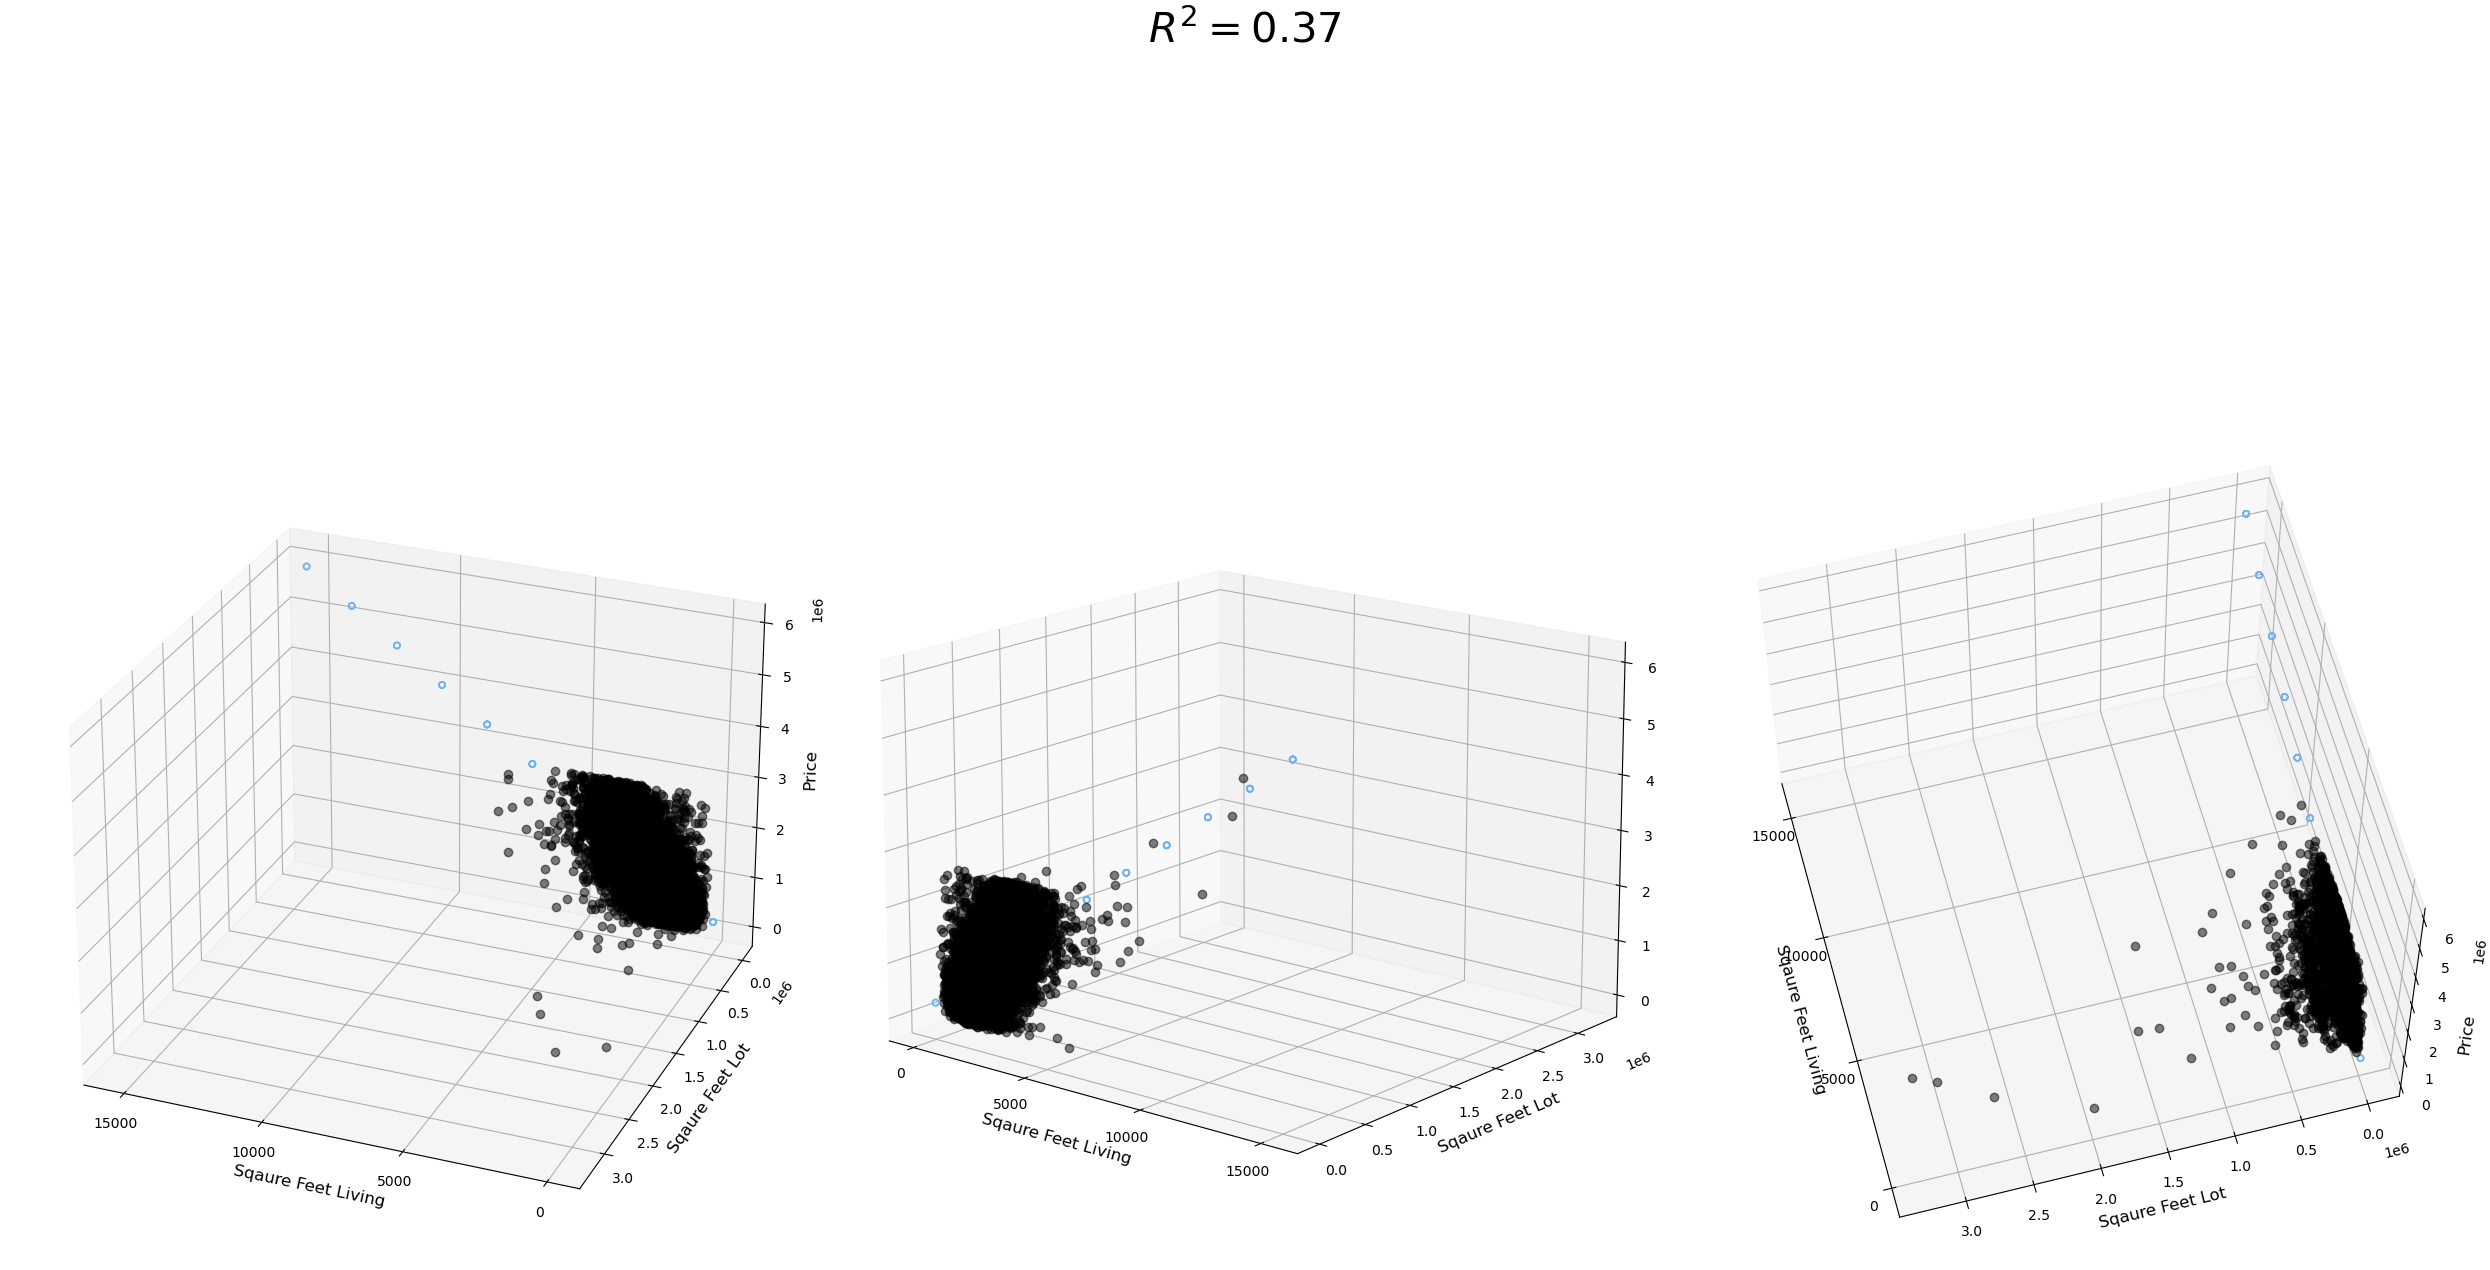

In [100]:
# Plot

plt.style.use('default')

fig = plt.figure(figsize=(25, 17))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Sqaure Feet Living', fontsize=12)
    ax.set_ylabel('Sqaure Feet Lot', fontsize=12)
    ax.set_zlabel('Price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2_model1, fontsize=30)

fig.tight_layout()

- Our VIF is 1.59 as observed here; I think we have no cause for concern on the issue of multicollinearity here.
- An R² of 0.37 is observed with this model.
- The p-values for all dimensions are lower than or equal to the threshold of 0.05, rejecting the null hypothesis and stating it could not only be chance.
- the Standard Error for this model is about 8000, which means prices float (vary) about 7751 dollars from the line given known inputs of square footage to this model.
- A low R² indicates that this model isn't the best at predicting home price. We move on to add other dimensions to our model.

## / Model 2: Examining 'grade' singularly

- Before we incorporate 'grade' to the existing model, we examine grade as a simple Regression problem.
- KCHA was particularly interested in this feature- since they are planning to allocate funding for a Home Facilities Management stakeholder, they wanted an in-depth understanding of how to quality of the bulding materials affect price. 
- We are also assuming that the higher the build quality of material, the more it will cost to maintain the public service for homeowners who live in homes built by better materials.
- Our assumptions strictly for this notebook are that the better the grade, the better the price of the sale of the home; this should reflect as an increase in our R².
- Model 2 will be price with grade alone.

In [101]:
# Model 2

# Firstly, we will model 'grade' alone

# Variable assignment
Y2 = df_modeling['price']
X2 = df_modeling[['grade_2 Substandard',
                 'grade_3 Poor',                     
                 'grade_4 Low',                      
                 'grade_5 Fair',                     
                 'grade_6 Low Average',             
                 'grade_7 Average',                  
                 'grade_8 Good',                     
                 'grade_9 Better',                   
                 'grade_10 Very Good',               
                 'grade_11 Excellent',              
                 'grade_12 Luxury',                  
                 'grade_13 Mansion',
                ]].astype(int)

In [102]:
# Modeling Grade
model_2 = sm.OLS(Y2, sm.add_constant(X2)).fit()
results_2 = model_2.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [103]:
# Summary
results_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     1062.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:25:53   Log-Likelihood:            -2.7653e+05
No. Observations:               19268   AIC:                         5.531e+05
Df Residuals:                   19257   BIC:                         5.532e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.001e+06   3.87e+04     25.890      0.000    9.25e+05    1.08e+06
grade_2 Substandard   -1.2e-09   3.55e-10     -3.384      0.001    -1.9e-09   -5.05e-10
grade_3 Poor        -4.608e+05   1.59e+05     -2.899      0.004   -7.72e+05   -1.49e+05
grade_4 Low         -4.397e+05   7.91e+04     -5.562      0.000   -5.95e+05   -2.85e+05
grade_5 Fair        -4.169e+05   4.58e+04     -9.099      0.000   -5.07e+05   -3.27e+05
grade_6 Low Average  -3.58e+05   3.97e+04     -9.012      0.000   -4.36e+05    -2.8e+05
grade_7 Average     -1.613e+05   3.89e+04     -4.146      0.000   -2.38e+05    -8.5e+04
grade_8 Good         8.218e+04    3.9e+04      2.109      0.035    5805.256    1.59e+05
grade_9 Better       4.886e+05   3.94e+04     12.399      0.000    4.11e+05    5.66e+05
grade_10 Very Good   8.563e+05   4.11e+04     20.834      0.000    7.76e+05    9.37e+05
grade_11 Excellent    1.08e+06   5.08e+04     21.244      0.000     9.8e+05    1.18e+06
grade_12 Luxury      1.292e+06   8.77e+04     14.726      0.000    1.12e+06    1.46e+06
grade_13 Mansion    -9.612e+05    3.8e+05     -2.532      0.011   -1.71e+06   -2.17e+05
==============================================================================
Omnibus:                     1728.213   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2594.997
Skew:                           0.697   Prob(JB):                         0.00
Kurtosis:                       4.136   Cond. No.                     3.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [104]:
# Assigning r2
r2_model2 = model_2.rsquared

In [105]:
# Quick VIF check
VIF(r2=r2_model2)

1.551666887331638


- We observe above our R² for grade alone is already higher than R² of the square foot of living and square feet of the lot.
- This strongly supports our assumption that grade is indicative about home price.

**Note: We skip naming a Model 3 for this report.**

## // Tying in grade to model 2 to model 1 to create model 4

In [106]:
# Model 4

# Variable Assignment
Y4 = df_modeling['price'].astype(int)
X4 = df_modeling[['sqft_living',
                  'sqft_lot',
                  'grade_4 Low',                      
                  'grade_5 Fair',                     
                  'grade_6 Low Average',
                  'grade_7 Average',                  
                  'grade_8 Good',                     
                  'grade_9 Better',                   
                  'grade_10 Very Good',
                  'grade_11 Excellent',              
                  'grade_12 Luxury',
                 ]].astype(int)


In [107]:
model_4 = sm.OLS(Y4, sm.add_constant(X4)).fit()
results_4 = model_4.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [108]:
results_4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     1334.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:25:53   Log-Likelihood:            -2.7530e+05
No. Observations:               19268   AIC:                         5.506e+05
Df Residuals:                   19256   BIC:                         5.507e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.579e+05   1.47e+05      1.075      0.282    -1.3e+05    4.46e+05
sqft_living           231.6181      4.573     50.645      0.000     222.654     240.582
sqft_lot                0.1010      0.045      2.247      0.025       0.013       0.189
grade_4 Low           2.56e+05   1.63e+05      1.570      0.116   -6.35e+04    5.75e+05
grade_5 Fair         2.084e+05   1.49e+05      1.399      0.162   -8.36e+04       5e+05
grade_6 Low Average   2.03e+05   1.47e+05      1.380      0.168   -8.53e+04    4.91e+05
grade_7 Average      2.808e+05   1.47e+05      1.912      0.056   -7119.569    5.69e+05
grade_8 Good         4.053e+05   1.47e+05      2.758      0.006    1.17e+05    6.93e+05
grade_9 Better        6.63e+05   1.47e+05      4.504      0.000    3.74e+05    9.52e+05
grade_10 Very Good   8.754e+05   1.48e+05      5.921      0.000    5.86e+05    1.17e+06
grade_11 Excellent   9.705e+05   1.51e+05      6.419      0.000    6.74e+05    1.27e+06
grade_12 Luxury      1.031e+06   1.68e+05      6.126      0.000    7.01e+05    1.36e+06
==============================================================================
Omnibus:                     1415.859   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2465.880
Skew:                           0.549   Prob(JB):                         0.00
Kurtosis:                       4.366   Cond. No.                     1.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
# VIF Model 4
VIF(r2=model_4.rsquared)

1.7621934671375228


- For Model 4 we observe a higher R² at 0.432 when we group
    - Square Feet of Living
    - Square Feet of Lot
    - Selected Significant Grades (Quality of Build Materials)
- Square Footage of Lot seems to be ineffectual based on coef readings. We will drop this feature in the next iteration of our model.
- When attempting to predict price.
- We observe higher error in lower grades of building materials as expressed by p-values crossing the 0.05 threshold.
- The next model iteration's focus will be to better fit the line to our price data.

## / Model 5

In [110]:
# Model 5


# Variable Assignment
Y5 = df_modeling['price'].astype(int)
X5 = df_modeling[['sqft_living',             
                  'grade_4 Low',                      
                  'grade_5 Fair',                     
                  'grade_6 Low Average',
                  'grade_7 Average',                  
                  'grade_8 Good',                     
                  'grade_9 Better',                   
                  'grade_10 Very Good',
                  'grade_11 Excellent',              
                  'grade_12 Luxury',
                  'condition_Poor',                   
                  'condition_Fair',                     
                  'condition_Average',                  
                  'condition_Good',                     
                  'condition_Very Good'
                 ]
                ].astype(int) 

In [111]:
model_5 = sm.OLS(Y5, sm.add_constant(X5)).fit()
results_5 = model_5.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [112]:
results_5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     1093.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:25:54   Log-Likelihood:            -2.7513e+05
No. Observations:               19268   AIC:                         5.503e+05
Df Residuals:                   19253   BIC:                         5.504e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.082e+05   1.23e+05      1.694      0.090   -3.27e+04    4.49e+05
sqft_living           225.8798      4.527     49.894      0.000     217.006     234.753
grade_4 Low          2.137e+05   1.64e+05      1.304      0.192   -1.08e+05    5.35e+05
grade_5 Fair         1.274e+05   1.52e+05      0.841      0.401    -1.7e+05    4.24e+05
grade_6 Low Average  1.151e+05    1.5e+05      0.766      0.444   -1.79e+05    4.09e+05
grade_7 Average      2.032e+05    1.5e+05      1.355      0.175   -9.08e+04    4.97e+05
grade_8 Good         3.474e+05    1.5e+05      2.315      0.021    5.32e+04    6.42e+05
grade_9 Better       6.176e+05    1.5e+05      4.109      0.000    3.23e+05    9.12e+05
grade_10 Very Good    8.37e+05   1.51e+05      5.544      0.000    5.41e+05    1.13e+06
grade_11 Excellent   9.395e+05   1.54e+05      6.093      0.000    6.37e+05    1.24e+06
grade_12 Luxury          1e+06   1.71e+05      5.858      0.000    6.65e+05    1.33e+06
condition_Poor      -7.061e+04   5.29e+04     -1.334      0.182   -1.74e+05    3.32e+04
condition_Fair       7.191e+04   3.92e+04      1.832      0.067   -5015.044    1.49e+05
condition_Average   -7842.4696   3.03e+04     -0.259      0.796   -6.73e+04    5.16e+04
condition_Good       5.852e+04   3.05e+04      1.921      0.055   -1192.003    1.18e+05
condition_Very Good  1.562e+05   3.09e+04      5.050      0.000    9.56e+04    2.17e+05
==============================================================================
Omnibus:                     1443.978   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2692.211
Skew:                           0.536   Prob(JB):                         0.00
Kurtosis:                       4.484   Cond. No.                     3.99e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.06e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- We observe only a small increase in our R² value at 0.443 when adding in condition, which indicates the general condition of the home are not generally good predictor dimensions when grouped with square feet of living, number of bedrooms, and grade.
- Next, we will explore our carefully selected features and how they correlate with price.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


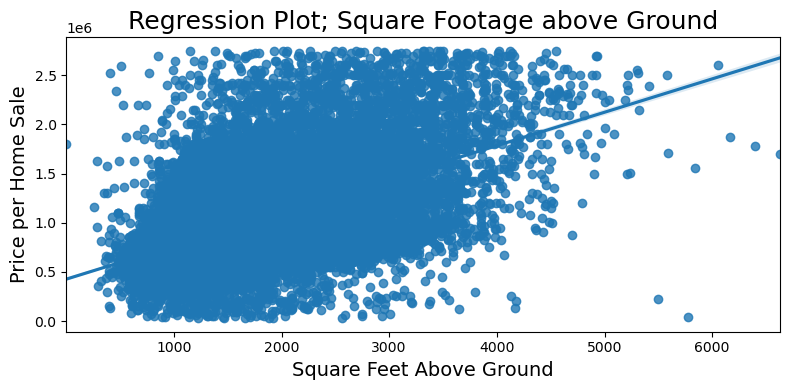

In [113]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.regplot(df_modeling['sqft_above'], df_modeling['price'])
ax.set_ylabel('Price per Home Sale', fontsize=14)
ax.set_xlabel('Square Feet Above Ground', fontsize=14)
ax.set_title('Regression Plot; Square Footage above Ground', fontsize=18)

fig.tight_layout()

## // Incorporating number of floors and city in Model 6

- In Model 6, we will incorporate the columns for the floors categorical and city categorical, as well as the square foot above numerical dimensions, which encompasses all square footage excluding the basement.

In [114]:
# Model 6

# Variable Assignment
Y6 = df_modeling['price']
X6 = df_modeling[['sqft_living',             
                  'grade_4 Low',                      
                  'grade_5 Fair',                     
                  'grade_6 Low Average',
                  'grade_7 Average',                  
                  'grade_8 Good',                     
                  'grade_9 Better',                   
                  'grade_10 Very Good',
                  'grade_11 Excellent',              
                  'grade_12 Luxury',
                  'condition_Poor',                   
                  'condition_Fair',                     
                  'condition_Average',                  
                  'condition_Good',                     
                  'condition_Very Good',
                  'floors_1.0',
                  'floors_1.5',
                  'floors_2.0',
                  'floors_2.5',
                  'floors_3.0',
                  'floors_3.5',
                  'floors_4.0',
                  'city_Auburn',
                  'city_Baring',
                  'city_Bellevue',
                  'city_Black Diamond',
                  'city_Bothell',
                  'city_Carnation',
                  'city_Duvall',
                  'city_Enumclaw',
                  'city_Fall City',
                  'city_Preston',
                  'city_Ravensdale',
                  'city_Redmond',
                  'city_Renton',
                  'city_Sammamish',
                  'city_Seattle',
                  'city_Skykomish',
                  'city_Snoqualmie',
                  'city_Vashon',
                  'city_Woodinville',
                  'sqft_above',
                 ]
                ]

In [115]:
model_6 = sm.OLS(Y6, sm.add_constant(X6)).fit()
results_6 = model_6.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [116]:
results_6

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     636.3
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:25:55   Log-Likelihood:            -2.7264e+05
No. Observations:               19268   AIC:                         5.454e+05
Df Residuals:                   19227   BIC:                         5.457e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.781e+04   9.83e+04      0.384      0.701   -1.55e+05    2.31e+05
sqft_living           230.0533      6.407     35.904      0.000     217.494     242.612
grade_4 Low           2.85e+05   1.44e+05      1.976      0.048    2339.629    5.68e+05
grade_5 Fair          1.88e+05   1.33e+05      1.410      0.158   -7.33e+04    4.49e+05
grade_6 Low Average  1.074e+05   1.32e+05      0.813      0.416   -1.52e+05    3.66e+05
grade_7 Average      1.738e+05   1.32e+05      1.317      0.188   -8.49e+04    4.33e+05
grade_8 Good          3.03e+05   1.32e+05      2.294      0.022    4.41e+04    5.62e+05
grade_9 Better       5.453e+05   1.32e+05      4.121      0.000    2.86e+05    8.05e+05
grade_10 Very Good   6.928e+05   1.33e+05      5.213      0.000    4.32e+05    9.53e+05
grade_11 Excellent   7.594e+05   1.36e+05      5.594      0.000    4.93e+05    1.03e+06
grade_12 Luxury      7.475e+05    1.5e+05      4.971      0.000    4.53e+05    1.04e+06
condition_Poor      -1.402e+05   4.61e+04     -3.042      0.002    -2.3e+05   -4.99e+04
condition_Fair      -1011.1825   3.32e+04     -0.030      0.976   -6.61e+04    6.41e+04
condition_Average   -8610.7955    2.5e+04     -0.345      0.730   -5.75e+04    4.03e+04
condition_Good       5.003e+04   2.51e+04      1.993      0.046     830.383    9.92e+04
condition_Very Good  1.376e+05   2.55e+04      5.388      0.000    8.75e+04    1.88e+05
floors_1.0           6.587e+04   2.52e+04      2.609      0.009    1.64e+04    1.15e+05
floors_1.5           9.952e+04   2.59e+04      3.845      0.000    4.88e+04     1.5e+05
floors_2.0           1.914e+04   2.51e+04      0.761      0.446   -3.01e+04    6.84e+04
floors_2.5           1.299e+05   3.57e+04      3.642      0.000       6e+04       2e+05
floors_3.0          -7.512e+04   2.74e+04     -2.741      0.006   -1.29e+05   -2.14e+04
floors_3.5          -1.057e+05   1.22e+05     -0.868      0.385   -3.44e+05    1.33e+05
floors_4.0          -9.573e+04   6.99e+04     -1.369      0.171   -2.33e+05    4.13e+04
city_Auburn         -2.831e+05    1.3e+04    -21.778      0.000   -3.09e+05   -2.58e+05
city_Baring         -7.502e+04   1.52e+05     -0.494      0.621   -3.72e+05    2.22e+05
city_Bellevue        4.864e+05    1.2e+04     40.441      0.000    4.63e+05     5.1e+05
city_Black Diamond  -2.433e+05   2.27e+04    -10.725      0.000   -2.88e+05   -1.99e+05
city_Bothell         1.865e+05   2.44e+04      7.655      0.000    1.39e+05    2.34e+05
city_Carnation       4417.2629   3.17e+04      0.139      0.889   -5.77e+04    6.65e+04
city_Duvall         -2.675e+04   2.48e+04     -1.078      0.281   -7.54e+04    2.19e+04
city_Enumclaw       -2.222e+05   1.86e+04    -11.925      0.000   -2.59e+05   -1.86e+05
city_Fall City       1.388e+05   3.69e+04      3.764      0.000    6.65e+04    2.11e+05
cit

- Here we observe a sizeable increase in our R² at 0.570. Let's check VIF real quick..

In [117]:
r2_model6 = model_6.rsquared
VIF(r2=r2_model6)

2.32366602086736


- Our observed VIF is still far less than 10, so multicollinearity is not skewing our model disproportionately here.
- We're getting better at improving our model to predict price; however there is still more work to be done. Next we look to incorporate more predictor variables into our model.

## / Model 7

- In Model 7, we incorporate the type of Heating Source used to generate central AC/Heating.
- King County is located in the Paciific Northwest. Daily Highs average drops below 50 degrees Farenheit from November to February accompanied with no less than 10 in. of rainfall.
- This data will be used not only to improve our model predictions, but a further usecase could be exploring how the a subset of homes incororating a certain heating source will affect the cost of the program, and Puget Sound Energy, the electrical utility company for this county, has expressed intrest in our findings.

In [118]:
# Model 7

# Variable Assignment
Y7 = df_modeling['price']
X7 = df_modeling[
                 ['sqft_living',             
                  'grade_4 Low',                      
                  'grade_5 Fair',                     
                  'grade_6 Low Average',
                  'grade_7 Average',                  
                  'grade_8 Good',                     
                  'grade_9 Better',                   
                  'grade_10 Very Good',
                  'grade_11 Excellent',              
                  'grade_12 Luxury',               
                  'condition_Poor',                   
                  'condition_Fair',                     
                  'condition_Average',                  
                  'condition_Good',                     
                  'condition_Very Good',
                  'floors_1.0',
                  'floors_1.5',
                  'floors_2.0',
                  'floors_2.5',
                  'floors_3.0',
                  'floors_3.5',
                  'floors_4.0',
                  'city_Auburn',
                  'city_Baring',
                  'city_Bellevue',
                  'city_Black Diamond',
                  'city_Bothell',
                  'city_Carnation',
                  'city_Duvall',
                  'city_Enumclaw',
                  'city_Fall City',
                  'city_Preston',
                  'city_Ravensdale',
                  'city_Redmond',
                  'city_Renton',
                  'city_Sammamish',
                  'city_Seattle',
                  'city_Skykomish',
                  'city_Snoqualmie',
                  'city_Vashon',
                  'city_Woodinville',
                  'sqft_above',
                  'heat_source_Other', 
                  'heat_source_Oil', 
                  'heat_source_Oil/Solar', 
                  'heat_source_Gas',
                  'heat_source_Gas/Solar', 
                  'heat_source_Electricity', 
                  'heat_source_Electricity/Solar'
                 ]
                ]

In [119]:
model_7 = sm.OLS(Y7, sm.add_constant(X7)).fit()
results_7 = model_7.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [120]:
results_7

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     556.2
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:25:55   Log-Likelihood:            -2.7261e+05
No. Observations:               19268   AIC:                         5.453e+05
Df Residuals:                   19221   BIC:                         5.457e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          8.111e+04   9.48e+04      0.855      0.392   -1.05e+05    2.67e+05
sqft_living                     228.9506      6.407     35.735      0.000     216.393     241.509
grade_4 Low                    2.969e+05   1.45e+05      2.052      0.040    1.33e+04     5.8e+05
grade_5 Fair                   1.959e+05   1.34e+05      1.464      0.143   -6.63e+04    4.58e+05
grade_6 Low Average            1.101e+05   1.33e+05      0.830      0.406    -1.5e+05     3.7e+05
grade_7 Average                1.734e+05   1.32e+05      1.309      0.191   -8.63e+04    4.33e+05
grade_8 Good                   3.016e+05   1.33e+05      2.275      0.023    4.18e+04    5.62e+05
grade_9 Better                 5.439e+05   1.33e+05      4.095      0.000    2.84e+05    8.04e+05
grade_10 Very Good             6.923e+05   1.33e+05      5.192      0.000    4.31e+05    9.54e+05
grade_11 Excellent             7.588e+05   1.36e+05      5.571      0.000    4.92e+05    1.03e+06
grade_12 Luxury                 7.42e+05   1.51e+05      4.923      0.000    4.47e+05    1.04e+06
condition_Poor                -1.283e+05    4.6e+04     -2.785      0.005   -2.19e+05    -3.8e+04
condition_Fair                 5413.2247   3.27e+04      0.166      0.869   -5.87e+04    6.95e+04
condition_Average              -790.3937   2.43e+04     -0.033      0.974   -4.84e+04    4.68e+04
condition_Good                 5.803e+04   2.44e+04      2.376      0.018    1.02e+04    1.06e+05
condition_Very Good            1.467e+05   2.48e+04      5.905      0.000     9.8e+04    1.95e+05
floors_1.0                     6.638e+04   2.52e+04      2.633      0.008     1.7e+04    1.16e+05
floors_1.5                     9.845e+04   2.58e+04      3.810      0.000    4.78e+04    1.49e+05
floors_2.0                     2.114e+04    2.5e+04      0.844      0.399   -2.79e+04    7.02e+04
floors_2.5                     1.289e+05   3.55e+04      3.628      0.000    5.93e+04    1.99e+05
floors_3.0                    -5.756e+04   2.74e+04     -2.103      0.035   -1.11e+05   -3921.488
floors_3.5                    -1.032e+05   1.21e+05     -0.850      0.395   -3.41e+05    1.35e+05
floors_4.0                    -7.308e+04   6.97e+04     -1.048      0.295    -2.1e+05    6.36e+04
city_Auburn                   -2.812e+05    1.3e+04    -21.657      0.000   -3.07e+05   -2.56e+05
city_Baring                   -5.735e+04   1.52e+05     -0.378      0.705   -3.54e+05     2.4e+05
city_Bellevue                  4.829e+05    1.2e+04     40.134      0.000    4.59e+05    5.06e+05
city_Black Diamond            -2.437e+05   2.27e+04    -10.757      0.000   -2.88e+05   -1.99e+05
city_Bothell                   1.854e+05   2.43e+04      7.618      0.000    1.38e+05    2.33e+05
city_Carnation                 1.116e+04   3.

- It seems like the heating source used for the home doesn't much affect our response variable.
- Due to a tiny increase in R², and to avoid overcomplicating the model, we choose to drop these heat source categorical columns for the next iteration.

## // Model 8

- The next features I will be incorporating into this model are 'yr_built', which addresses values of when the house was built, and the 'sqft_garage', and 'sqft_patio'.
- The heatmap illustrated above indicates that these square foot dimensions about the house may introduce multicollinearity, which skews our model's accuracy.
- We will use VIF post-model.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


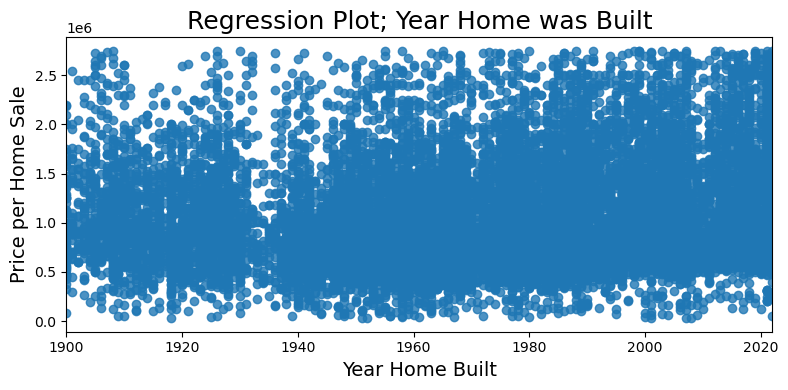

In [121]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.regplot(df_modeling['yr_built'], df_modeling['price'])
ax.set_ylabel('Price per Home Sale', fontsize=14)
ax.set_xlabel('Year Home Built', fontsize=14)
ax.set_title('Regression Plot; Year Home was Built', fontsize=18)

fig.tight_layout()

- Wow, that's noisy.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


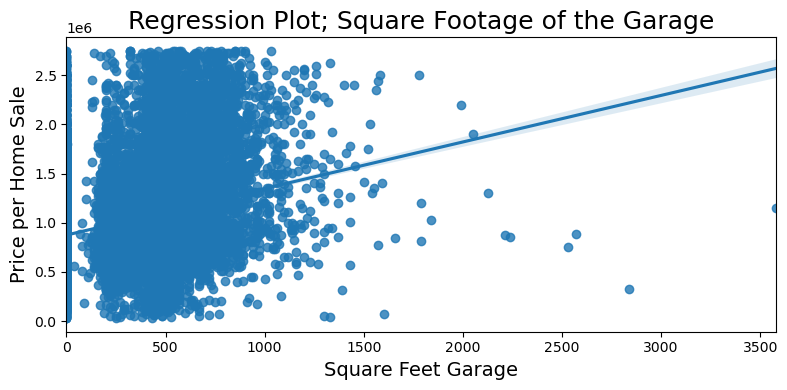

In [122]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.regplot(df_modeling['sqft_garage'], df_modeling['price'])
ax.set_ylabel('Price per Home Sale', fontsize=14)
ax.set_xlabel('Square Feet Garage', fontsize=14)
ax.set_title('Regression Plot; Square Footage of the Garage', fontsize=18)

fig.tight_layout()

- This plot gives us insight into how the garage space affects price. To the left, we observe a thick, vertical, linear values at 0; meaning a lot of these home sales do not even include a garage.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


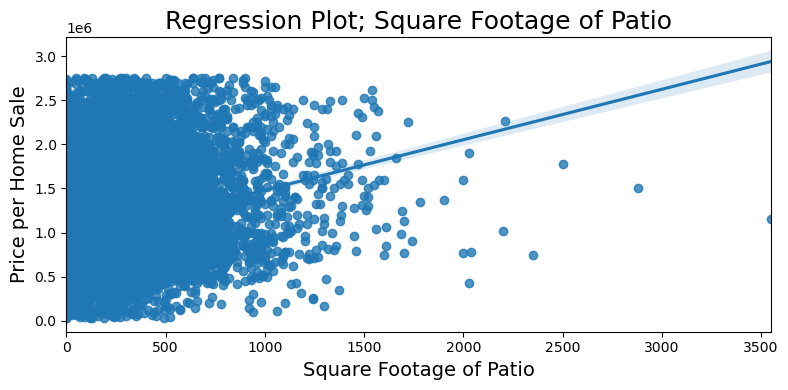

In [123]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.regplot(df_modeling['sqft_patio'], df_modeling['price'])
ax.set_ylabel('Price per Home Sale', fontsize=14)
ax.set_xlabel('Square Footage of Patio', fontsize=14)
ax.set_title('Regression Plot; Square Footage of Patio', fontsize=18)

fig.tight_layout()

- We may explore this and re-engineer this feature, but for now let's just run our model with these new dimensions..

In [124]:
# Model 8

In [125]:
# Assigning the Variables
Y8 = df_modeling['price']
X8 = df_modeling[['sqft_living',             
                  'grade_4 Low',                      
                  'grade_5 Fair',                     
                  'grade_6 Low Average',
                  'grade_7 Average',                  
                  'grade_8 Good',                     
                  'grade_9 Better',                   
                  'grade_10 Very Good',
                  'grade_11 Excellent',              
                  'grade_12 Luxury',               
                  'condition_Poor',                   
                  'condition_Fair',                     
                  'condition_Average',                  
                  'condition_Good',                     
                  'condition_Very Good',
                  'floors_1.0',
                  'floors_1.5',
                  'floors_2.0',
                  'floors_2.5',
                  'floors_3.0',
                  'floors_3.5',
                  'floors_4.0',
                  'city_Auburn',
                  'city_Baring',
                  'city_Bellevue',
                  'city_Black Diamond',
                  'city_Bothell',
                  'city_Carnation',
                  'city_Duvall',
                  'city_Enumclaw',
                  'city_Fall City',
                  'city_Preston',
                  'city_Ravensdale',
                  'city_Redmond',
                  'city_Renton',
                  'city_Sammamish',
                  'city_Seattle',
                  'city_Skykomish',
                  'city_Snoqualmie',
                  'city_Vashon',
                  'city_Woodinville',
                  'sqft_above',
                  'yr_built',
                  'sqft_garage',
                  'sqft_patio',
                 ]
                ]

In [126]:
model_8 = sm.OLS(Y8, sm.add_constant(X8)).fit()
results_8 = model_8.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [127]:
results_8

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     618.5
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:25:58   Log-Likelihood:            -2.7239e+05
No. Observations:               19268   AIC:                         5.449e+05
Df Residuals:                   19224   BIC:                         5.452e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.579e+06   2.04e+05     17.527      0.000    3.18e+06    3.98e+06
sqft_living           218.7220      6.468     33.815      0.000     206.044     231.400
grade_4 Low           2.64e+05   1.42e+05      1.853      0.064   -1.52e+04    5.43e+05
grade_5 Fair         1.672e+05   1.32e+05      1.270      0.204   -9.09e+04    4.25e+05
grade_6 Low Average   1.25e+05    1.3e+05      0.958      0.338   -1.31e+05    3.81e+05
grade_7 Average      2.305e+05    1.3e+05      1.768      0.077    -2.5e+04    4.86e+05
grade_8 Good         3.863e+05   1.31e+05      2.959      0.003     1.3e+05    6.42e+05
grade_9 Better       6.422e+05   1.31e+05      4.911      0.000    3.86e+05    8.99e+05
grade_10 Very Good   7.924e+05   1.31e+05      6.032      0.000    5.35e+05    1.05e+06
grade_11 Excellent   8.671e+05   1.34e+05      6.461      0.000    6.04e+05    1.13e+06
grade_12 Luxury       8.48e+05   1.49e+05      5.703      0.000    5.57e+05    1.14e+06
condition_Poor       5.566e+05   5.77e+04      9.640      0.000    4.43e+05     6.7e+05
condition_Fair       6.969e+05   4.82e+04     14.444      0.000    6.02e+05    7.91e+05
condition_Average    7.295e+05   4.47e+04     16.335      0.000    6.42e+05    8.17e+05
condition_Good       7.589e+05   4.36e+04     17.394      0.000    6.73e+05    8.44e+05
condition_Very Good  8.368e+05   4.36e+04     19.196      0.000    7.51e+05    9.22e+05
floors_1.0           5.192e+05   3.35e+04     15.511      0.000    4.54e+05    5.85e+05
floors_1.5           5.076e+05   3.28e+04     15.452      0.000    4.43e+05    5.72e+05
floors_2.0           5.231e+05   3.53e+04     14.830      0.000    4.54e+05    5.92e+05
floors_2.5           5.781e+05    4.2e+04     13.761      0.000    4.96e+05     6.6e+05
floors_3.0           4.842e+05   3.96e+04     12.230      0.000    4.07e+05    5.62e+05
floors_3.5           4.779e+05   1.24e+05      3.856      0.000    2.35e+05    7.21e+05
floors_4.0           4.886e+05   7.52e+04      6.493      0.000    3.41e+05    6.36e+05
city_Auburn         -2.822e+05   1.28e+04    -21.980      0.000   -3.07e+05   -2.57e+05
city_Baring         -8.478e+04    1.5e+05     -0.566      0.572   -3.79e+05    2.09e+05
city_Bellevue        4.584e+05    1.2e+04     38.353      0.000    4.35e+05    4.82e+05
city_Black Diamond  -2.182e+05   2.25e+04     -9.716      0.000   -2.62e+05   -1.74e+05
city_Bothell         1.763e+05   2.41e+04      7.325      0.000    1.29e+05    2.23e+05
city_Carnation       1.185e+04   3.13e+04      0.378      0.705   -4.95e+04    7.32e+04
city_Duvall         -2.014e+04   2.45e+04     -0.822      0.411   -6.82e+04    2.79e+04
city_Enumclaw        -2.25e+05   1.84e+04    -12.227      0.000   -2.61e+05   -1.89e+05
city_Fall City       1.254e+05   3.65e+04      3.437      0.001    5.39e+04    1.97e+05
cit

In [128]:
# We're good
r2_model8 = model_8.rsquared
VIF(r2=r2_model8)

2.3834019017554597


- We observe a very slight increase in our R² at 0.580.
- Please note the coefficents. There are a lot of columns that are returning p-values over our threshold of 0.05, indicating the we fail to reject the null hypothesis and consider that chance may have just an equal effect to price as the specified variable does.

## // Model 9

- In this model we will incorporate 'age'  and drop columns whose p-vals exceed the threshold of 0.05 in an attempt to improve the accuracy of our model. 
- Next, we will incorporate these dimensions into our model by editing our variable assignment, run the model, then check for multicollinearity, this time using VIF and Tolerance.

    - Note: Our threshold for attention to given **Tolerance** coefficent is 10. A value greater than 10 indicates skewing of the model.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


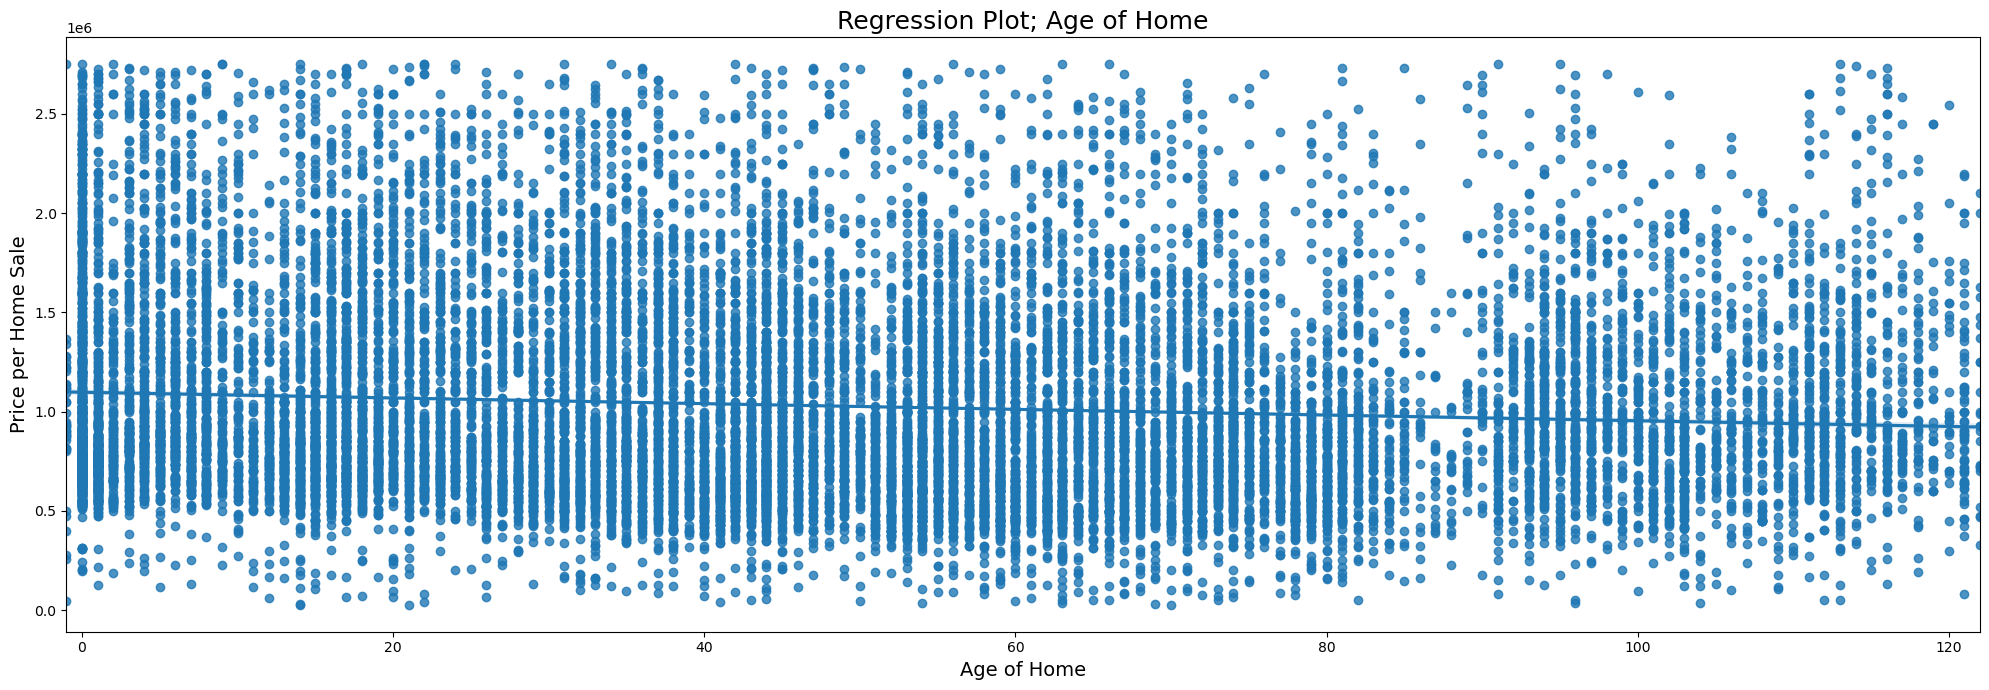

In [129]:
fig, ax = plt.subplots(figsize=(20, 7))

sns.regplot(df_modeling['age'], df_modeling['price'])
ax.set_ylabel('Price per Home Sale', fontsize=14)
ax.set_xlabel('Age of Home', fontsize=14)
ax.set_title('Regression Plot; Age of Home', fontsize=18)

fig.tight_layout()

- Judging by the plot, this feature seems to be evenly distributed among all ages of the home. You can observe the regression line gently sloping downwards however, which just indicates there are slightly more expensive home sales when it comes to newer homes than expensive home sales for old homes.

In [130]:
# Model 9

In [131]:
# Assigning the Variables
Y9 = df_modeling['price']
X9 = df_modeling[['sqft_living',                  
                  'grade_8 Good',                     
                  'grade_9 Better',                   
                  'grade_10 Very Good',
                  'grade_11 Excellent',              
                  'grade_12 Luxury',               
                  'bathrooms',
                  'condition_Poor',                   
                  'condition_Fair',                     
                  'condition_Average',                  
                  'condition_Good',                     
                  'condition_Very Good',
                  'floors_1.0',
                  'floors_1.5',
                  'floors_2.0',
                  'floors_2.5',
                  'floors_3.0',
                  'floors_3.5',
                  'floors_4.0',
                  'city_Auburn',
                  'city_Bellevue',
                  'city_Black Diamond',
                  'city_Bothell',
                  'city_Enumclaw',
                  'city_Fall City',
                  'city_Preston',
                  'city_Ravensdale',
                  'city_Redmond',
                  'city_Renton',
                  'city_Sammamish',
                  'city_Seattle',
                  'city_Skykomish',
                  'city_Snoqualmie',
                  'city_Woodinville',
                  'sqft_above',
                  'sqft_lot',
                  'yr_built',
                  'sqft_patio',
                  'sqft_garage',
                  'age',
                 ]
                ]

In [132]:
model_9 = sm.OLS(Y9, sm.add_constant(X9)).fit()
results_9 = model_9.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [133]:
results_9

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     756.3
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:26:00   Log-Likelihood:            -2.7195e+05
No. Observations:               19268   AIC:                         5.440e+05
Df Residuals:                   19229   BIC:                         5.443e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.152e+08   7.44e+06    -28.938      0.000    -2.3e+08   -2.01e+08
sqft_living           192.4741      7.371     26.112      0.000     178.026     206.922
grade_8 Good         1.579e+05   6518.607     24.217      0.000    1.45e+05    1.71e+05
grade_9 Better       4.088e+05   9775.264     41.816      0.000     3.9e+05    4.28e+05
grade_10 Very Good   5.571e+05   1.54e+04     36.065      0.000    5.27e+05    5.87e+05
grade_11 Excellent   6.218e+05   3.09e+04     20.119      0.000    5.61e+05    6.82e+05
grade_12 Luxury      6.012e+05   6.97e+04      8.626      0.000    4.65e+05    7.38e+05
bathrooms            5.118e+04   4807.226     10.647      0.000    4.18e+04    6.06e+04
condition_Poor      -4.322e+07   1.49e+06    -29.044      0.000   -4.61e+07   -4.03e+07
condition_Fair      -4.307e+07   1.49e+06    -28.952      0.000    -4.6e+07   -4.02e+07
condition_Average   -4.302e+07   1.49e+06    -28.921      0.000   -4.59e+07   -4.01e+07
condition_Good      -4.299e+07   1.49e+06    -28.902      0.000   -4.59e+07   -4.01e+07
condition_Very Good -4.291e+07   1.49e+06    -28.854      0.000   -4.58e+07      -4e+07
floors_1.0          -3.073e+07   1.06e+06    -28.926      0.000   -3.28e+07   -2.86e+07
floors_1.5          -3.074e+07   1.06e+06    -28.936      0.000   -3.28e+07   -2.87e+07
floors_2.0          -3.073e+07   1.06e+06    -28.927      0.000   -3.28e+07   -2.86e+07
floors_2.5          -3.068e+07   1.06e+06    -28.875      0.000   -3.28e+07   -2.86e+07
floors_3.0          -3.077e+07   1.06e+06    -28.959      0.000   -3.29e+07   -2.87e+07
floors_3.5          -3.081e+07   1.07e+06    -28.783      0.000   -3.29e+07   -2.87e+07
floors_4.0          -3.076e+07   1.06e+06    -28.896      0.000   -3.28e+07   -2.87e+07
city_Auburn         -2.904e+05   1.25e+04    -23.283      0.000   -3.15e+05   -2.66e+05
city_Bellevue        4.646e+05   1.16e+04     39.982      0.000    4.42e+05    4.87e+05
city_Black Diamond  -2.228e+05   2.19e+04    -10.174      0.000   -2.66e+05    -1.8e+05
city_Bothell         1.779e+05   2.35e+04      7.575      0.000    1.32e+05    2.24e+05
city_Enumclaw       -2.429e+05    1.8e+04    -13.475      0.000   -2.78e+05   -2.08e+05
city_Fall City         7.4e+04   3.57e+04      2.074      0.038    4065.967    1.44e+05
city_Preston         4.648e+05   1.89e+05      2.460      0.014    9.45e+04    8.35e+05
city_Ravensdale     -1.566e+05   4.53e+04     -3.453      0.001   -2.45e+05   -6.77e+04
city_Redmond         4.114e+05    1.3e+04     31.535      0.000    3.86e+05    4.37e+05
city_Renton         -1.135e+05   9397.181    -12.078      0.000   -1.32e+05   -9.51e+04
city_Sammamish       3.783e+05   1.32e+04     28.690      0.000    3.52e+05    4.04e+05
city_Seattle         1.385e+05   7427.869     18.648      0.000    1.24e+05    1.53e+05
cit

In [134]:
# VIF check
r2_model9 = model_9.rsquared
VIF(r2_model9)

2.494571917184036


In [135]:
tolerance(r2=r2_model9)

0.40087038305507605


- Model 9 achieves an R² of 0.599.
- Our two checks for multicollinearity reveal that it is unlikely that it is affecting/skewing our model.
- In essence, this model should predict the home price with the given values just about 50% of the time.

## // RFE Model

In [136]:
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

- Our next test is going to be a Recursive Feature Elimination, which will help us determine the 10 best features to use in determining home price using a Decsion Tree Algorithm: **Random Forest**.
- More info on RFE can be found here:
https://www.kaggle.com/code/carlmcbrideellis/recursive-feature-elimination-rfe-example/notebook
- In our analysis, we will first be using RFE to call a list of features ranked from best to worst. Then we subselect for the 10 best features by process "backward elimination" based on a training and test dataset that we will be doing predictive modeling on.

In [137]:
# Assigning variables
X, y = df_modeling.iloc[0: , 1:85], df_modeling.iloc[0: , 0]

In [138]:
# Train, Test, Split
X_train, X_test, y_train, y_test= train_test_split(X, 
                                                   y, 
                                                   test_size = 0.33, 
                                                   random_state = 1777777)

In [139]:
# Assigning regressor function
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)

In [140]:
# Calling a list of the best to worst features to use based on modeling
n_features_to_select = 1
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(max_depth=10), n_features_to_select=1)

In [141]:
# Returning the list of features best - worst
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 sqft_living
2 lat
3 long
4 sqft_lot
5 sqft_above
6 age
7 grade_7 Average
8 sell_year
9 sqft_patio
10 grade_8 Good
11 sqft_garage
12 yr_built
13 sqft_basement
14 view_EXCELLENT
15 bathrooms
16 grade_9 Better
17 condition_Average
18 view_NONE
19 bedrooms
20 heat_source_Gas
21 city_Bellevue
22 condition_Very Good
23 grade_6 Low Average
24 yr_renovated
25 grade_10 Very Good
26 heat_source_Oil
27 floors
28 grade_13 Mansion
29 view_GOOD
30 view_AVERAGE
31 heat_source_Electricity
32 condition_Good
33 sewer_system_PUBLIC
34 heat_source_Gas/Solar
35 city_Seattle
36 city_Vashon
37 city_Duvall
38 grade_11 Excellent
39 floors_1.5
40 floors_2.0
41 greenbelt_YES
42 waterfront_YES
43 city_Woodinville
44 floors_1.0
45 city_Renton
46 condition_Fair
47 sewer_system_PRIVATE
48 floors_2.5
49 city_Redmond
50 city_Carnation
51 city_Fall City
52 city_Sammamish
53 city_Black Diamond
54 condition_Poor
55 grade_5 Fair
56 grade_4 Low
57 heat_source_Electricity/Solar
58 city_Auburn
59 view_FAIR
60 floors_3.0
61

- The above cell returns an ordered list of the best to worst features to use, based on Random Forest Algorithm, modeling the training and test sets which consist of all dimensions in the dataframe.
- Its not surprising that we find here a lot of the square footage metrics are in the top 10.
- Some categoricals appear in the top 10, however, they do not include the whole set

# / Final Model

- For our final model, we consider the following
    1. Examination of coefficients and errors in previous models.
    2. Effect on R², but also std error & p-values.
    3. The return from our RFE testing..
    
 
 - And create the following subset of features to create the final model.

In [142]:
# Variable Assignment
Y_final = df_modeling['price']
X_final = df_modeling[
                      [
                       'sqft_living',
                       'sqft_lot',
                       'sqft_above',
                       'sqft_patio',
                       'lat',
                       'long',
                       'sell_year',
                       'age',
                       'grade_7 Average',
                       'grade_8 Good',
                       'grade_9 Better',                   
                       'grade_10 Very Good',
                       'sqft_garage',
                       'yr_built',
                       'view_EXCELLENT',
                       'sqft_basement',
                       'condition_Average',
                       'condition_Good',
                       'condition_Very Good',
                       'view_NONE',
                       'heat_source_Oil',
                       'heat_source_Gas',
                       'city_Bellevue',
                       'city_Seattle'
                       ]
                      ] 

In [143]:
model_final = sm.OLS(Y_final, sm.add_constant(X_final)).fit()
results_final = model_final.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [144]:
results_final

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1566.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:32:43   Log-Likelihood:            -2.7060e+05
No. Observations:               19268   AIC:                         5.412e+05
Df Residuals:                   19244   BIC:                         5.414e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.607e+08   9.74e+06    -37.021      0.000    -3.8e+08   -3.42e+08
sqft_living           172.2158      9.935     17.334      0.000     152.742     191.690
sqft_lot                0.3488      0.036      9.600      0.000       0.278       0.420
sqft_above            116.8426     10.561     11.063      0.000      96.141     137.544
sqft_patio             46.4693     10.323      4.502      0.000      26.236      66.703
lat                  1.472e+06   1.75e+04     84.057      0.000    1.44e+06    1.51e+06
long                 1.924e+04    2.1e+04      0.916      0.360   -2.19e+04    6.04e+04
sell_year            9.715e+04   3063.401     31.712      0.000    9.11e+04    1.03e+05
age                  4.921e+04   1530.886     32.142      0.000    4.62e+04    5.22e+04
grade_7 Average     -1.535e+04   7823.145     -1.962      0.050   -3.07e+04     -14.237
grade_8 Good          9.19e+04   9025.565     10.182      0.000    7.42e+04     1.1e+05
grade_9 Better       2.858e+05   1.14e+04     25.123      0.000    2.64e+05    3.08e+05
grade_10 Very Good   4.305e+05   1.58e+04     27.261      0.000       4e+05    4.61e+05
sqft_garage            18.0695     11.248      1.607      0.108      -3.977      40.116
yr_built             4.794e+04   1534.180     31.249      0.000    4.49e+04    5.09e+04
view_EXCELLENT       2.734e+05   2.18e+04     12.559      0.000    2.31e+05    3.16e+05
sqft_basement          27.8161      8.125      3.424      0.001      11.891      43.742
condition_Average    6.955e+04   2.31e+04      3.011      0.003    2.43e+04    1.15e+05
condition_Good       1.242e+05   2.32e+04      5.355      0.000    7.87e+04     1.7e+05
condition_Very Good  2.021e+05   2.38e+04      8.500      0.000    1.56e+05    2.49e+05
view_NONE           -1.274e+05   7738.175    -16.465      0.000   -1.43e+05   -1.12e+05
heat_source_Oil     -5445.3391   9168.220     -0.594      0.553   -2.34e+04    1.25e+04
heat_source_Gas      4.198e+04   5812.279      7.222      0.000    3.06e+04    5.34e+04
city_Bellevue        3.324e+05   1.05e+04     31.654      0.000    3.12e+05    3.53e+05
city_Seattle        -1.694e+04   7631.152     -2.219      0.026   -3.19e+04   -1977.957
==============================================================================
Omnibus:                     2038.903   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12644.663
Skew:                           0.315   Prob(JB):                         0.00
Kurtosis:                       6.918   Cond. No.                     8.65e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-18. This 

In [145]:
rmse_residuals = np.sqrt(model_final.mse_resid)
print("The RMSE for this model is:", rmse_residuals)

The RMSE for this model is: 304211.0600187805


In [146]:
r2_final = model_final.rsquared

In [147]:
VIF(r2=r2_final)

2.871993049366213


In [148]:
tolerance(r2=r2_final)

0.3481902577099476


- Here we prsent our final model analysis:


1. **Coefficients**
        I. **R²**
            - We observe our highest R² at 0.652
            - This indicates that the chosen sub selection of features is better than random chance at helping               predict home sale price.
        II. **coef**
            - The features with the highest coefficients are mostly categoricals
            - We did not include every category for our categorical encoded columns, but we can                               observe that we have placed different categoricals representing different effects on price,                     expressed as the coef. All categories that have a high coef contain a category in the same class               that usually has a reciprocal negative coef. This in theory should help the model precision when               it comes to a home sale meeting one condition, but not the others, while streamlining the model                 by removing ineffective categories of theat class. Ex. Streamlining the 13 Grade columns into 4                 while improving the accuracy of the model.
         III. **p-value**
             - The majority of the subselection of features' p-values do not even cross the threshold of 0.05,                and the ones that do only do so minimally (the highest p-value observed for this model is for                  'heat_source_Oil', at 0.5. Greater error, but when we consider its counterpart: Gas, in lieu                     with consideration based on domain intelligence, we opt to keep it in our model to oppose                      'heat_source_gas
         IV. **RMSE** 
             - The square root of the Mean Squared Error presented is 304211.
             - This will help us analyze our goodness of fit with an opposing Machine Learning model in the                    next section.
2. **Choice of Features**
         I. **Determinants**
             - The main determinants of choice for features represented in our final model is what Model 9                    produced, then using the RFE method to help us eliminate unneccesary variables from Model 9.
             - The improvement in model accuracy R² combined with the low p-value scores validates our choice                  post-model.
         II. **Considerations**
             - Please note 42 home sales were eliminated for having negative values for heating source and                    sewer system features. Our assumption is that for a Home Facilities Management stakeholder, the                lack of heating source and sewer system probably indicates the house is not in suitable living                  conditions according to housing code. Perhaps we can get an assesor on the ground to investigate                the condition of these homes.
             - We also dropped home sales below 350000
                 - This is an equitable adjustment to the solution since the low sale price indicates a                            homeowner that may be financially struggling. In addition a lower home sale price may                          generally indicate that the cost for repairs and maintenance is going to be lower, making it                    easier for the stakeholder to absorb these homes while protecting the financial security of                    the most needy.
             - We also did not include home sales above 2.5 million
                 - Cost to repair these homes will put extra strain on the budget
                 - Homeowners in this category will have to rely on themselves and                                                should be excluded from the program.

## // k-NN Model

Next we we will incorporate k-Nearest Neighbors (k-NN) machine learning algorithm and oppose it to our multiple regression model.

- More information can be found here:
    
    - https://www.diva-portal.org/smash/get/diva2:1354741/FULLTEXT01.pdf


- Basically a k-NN algorithm is an algorithm that assumes that any item in the data set should have a similar value for the prediction of the response variable if they share similar values for other exogenous features.
- Applicable to this Housing Dataset, this is expressed as Y, which is this endogenous variable predicted by the k value of neighbors that are most alike.


- k-NN makes an attempt to determine conditional class possibilities for any exogenous data point by looking at observed classes for similar values of that data point in the training set.

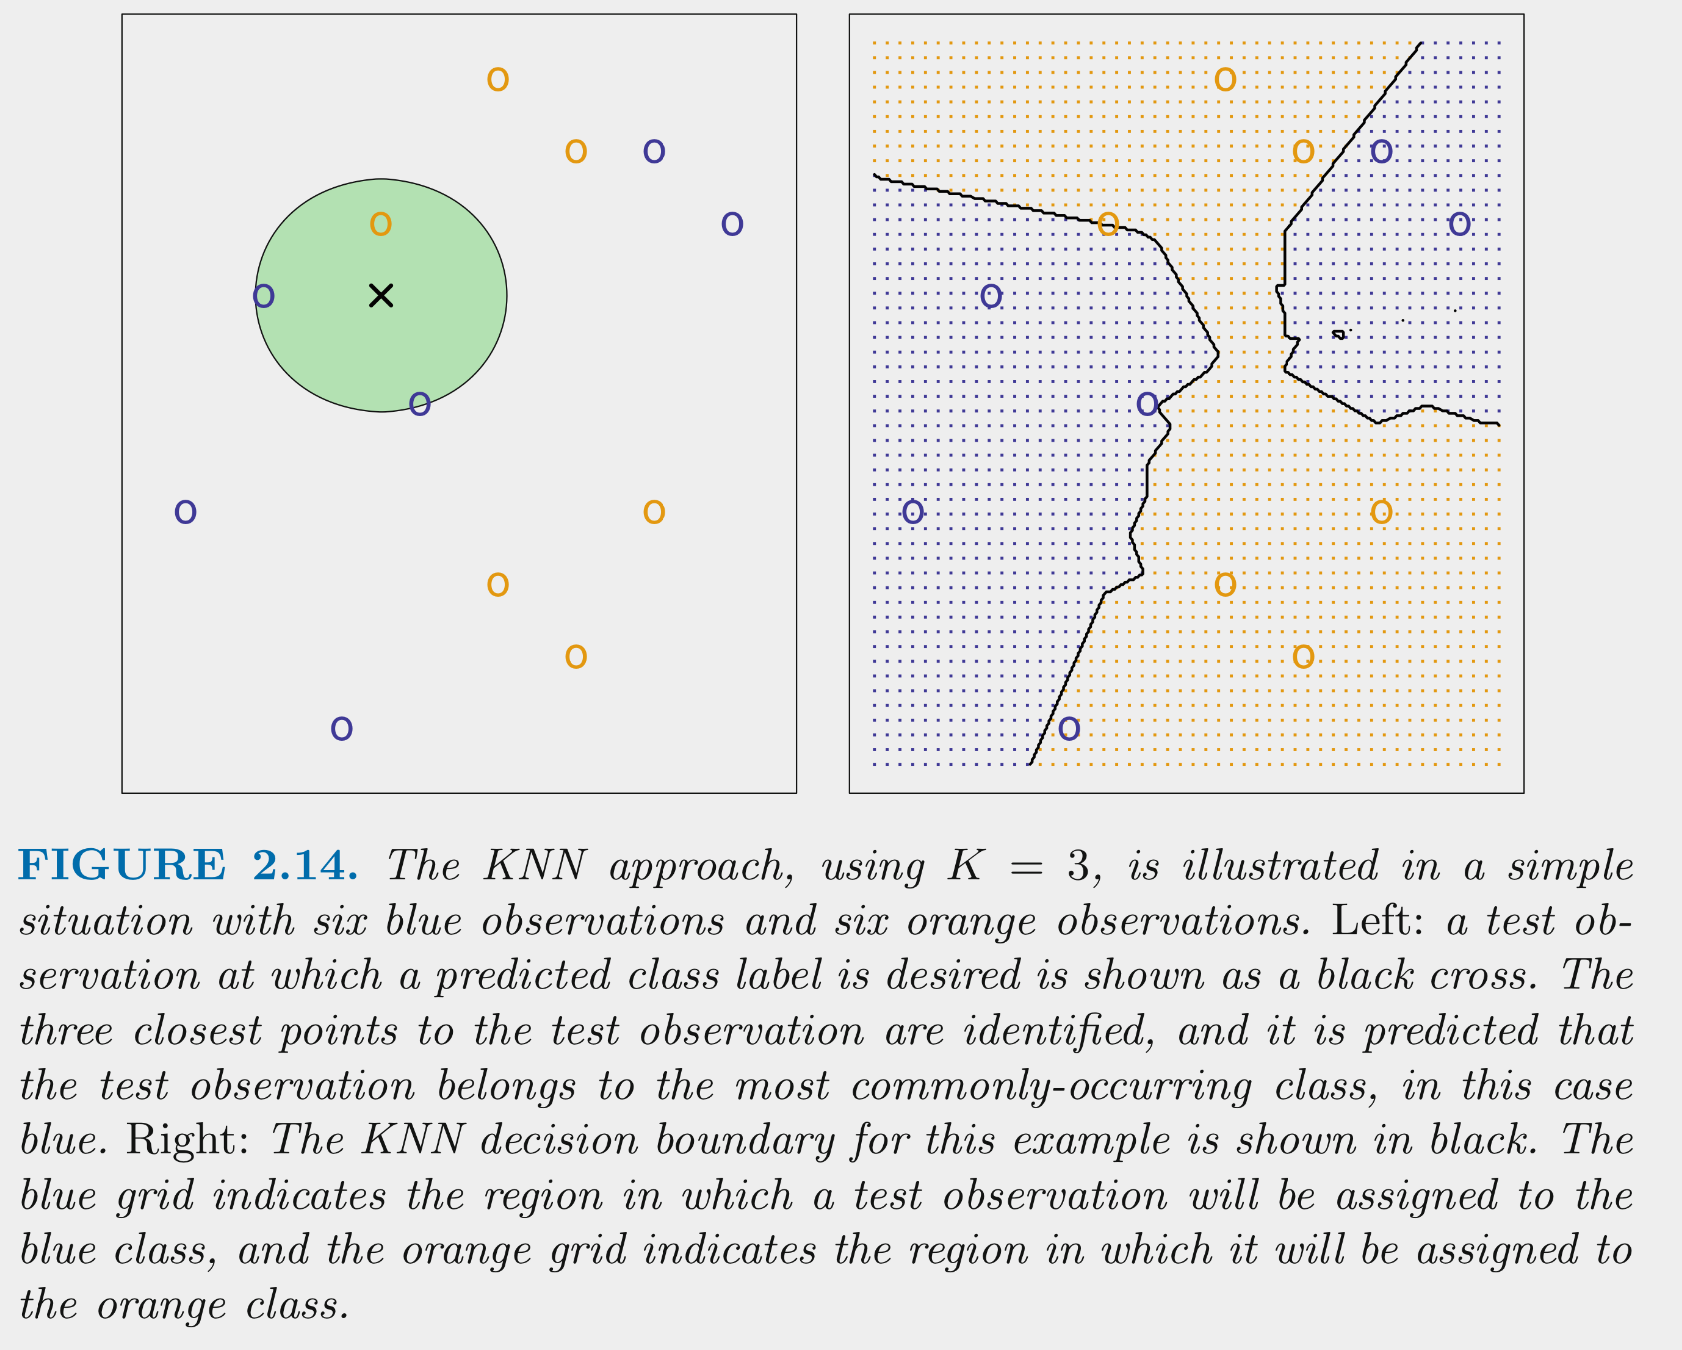

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn import metrics

- Our first step here in this machine learning algorithm is to help us decide the value of k - the number of nearest neighbors. To help us do this, we run instances of the model with n_neighbors set from 2 to 21, then visualize the scores.

In [150]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [151]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.49694011929661475, 0.007862871520679353]
3 : [0.3309319079711829, 0.006290297216543481]
4 : [0.24943837632659385, 0.00534675263406196]
5 : [0.20288171043458053, 0.00581852492530272]
6 : [0.17421953675730112, 0.004560465481994024]
7 : [0.15601518320551552, 0.003931435760339676]
8 : [0.1402122550158804, 0.0044032080515804374]
9 : [0.1285924548764428, 0.005189495203648372]
10 : [0.11906421876210396, 0.00581852492530272]
11 : [0.1120923386784414, 0.005975782355716308]
12 : [0.10659229994577427, 0.0061330397861298945]
13 : [0.10295142923541716, 0.005975782355716308]
14 : [0.09954295452784878, 0.006290297216543481]
15 : [0.09659927182585792, 0.00691932693819783]
16 : [0.09257107444418623, 0.007076584368611417]
17 : [0.08916259973661786, 0.007862871520679353]
18 : [0.08583159036331242, 0.008177386381506526]
19 : [0.08203578898442947, 0.008177386381506526]
20 : [0.08056394763343404, 0.008020128951092938]


Below are the training and test score visualizations:

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


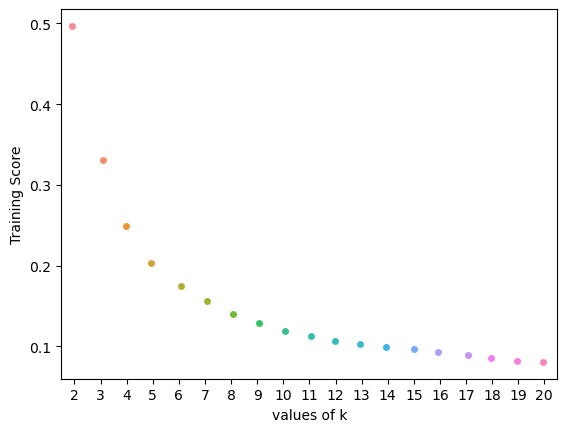

In [152]:
# Train
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


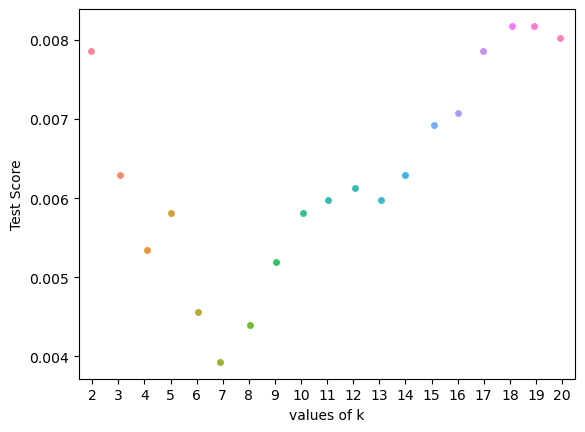

In [153]:
# Test
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

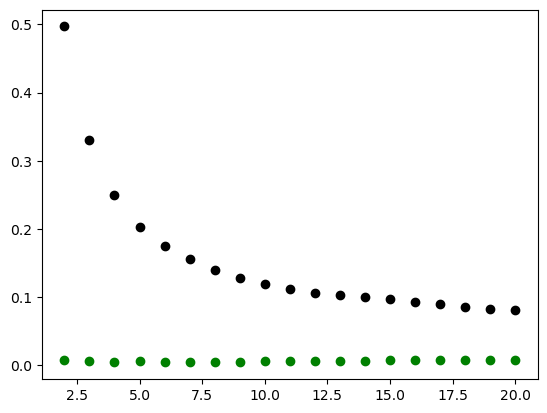

In [154]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

- From the data above, we conclude that the optimal number of nearest neigbors (n_neighbors) is 20
- For our k-NN model, we will then choose n_neighbors = 20

In [155]:
knn_model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print("Accuracy", acc)

Accuracy 0.6851151245537466


In [156]:
pred_y = model.predict(X_train)

In [157]:
mse = mean_squared_error(y_train, pred_y)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 282204.3965664784


- We recall the R² and RMSE for the **final model** observed was 0.652 & 304211.0600187805.
- The **k-NN algorithm** predictions produce a higher R² of 0.685 & a lower RMSE of 282204.3965664784.

## // k-NN Conclusion
- We can conclude: the **k-NN** algorithm performs slightly better than our final model when the number of nearest neighbors is set to 20.

## VII. Results/Findings

We ran through 10 iterations of our Linear Regression model, successively increasing our model accuracy by adding dimensions and observing given coefficients.

The baseline model chosen was:

   - Response: Home Sale Price

   - Predictor: Square Footage of Living Space
    
The baseline model returned an R² value of 0.37, and a p-value that did not meet threshold, indicating that we can reject the null hypothesis in this case (𝐻0 = Square Footage is statistically insignificant in predicting price. The coefficient returns 363.4873, which means for every increment increase in Square Footage, the price may be affected, in this case, a prediction of roughly an extra $ 363 tacked on to the price per extra square foot.

Our final model incorporates:

    - Response: Home Sale Price
   
    - 23 Predictors: 
        sqft_living
        sqft_lot
        sqft_above
        sqft_patio
        lat
        long
        sell_year
        age
        grade_7 Average
        grade_8 Good
        grade_9 Better                   
        grade_10 Very Good
        sqft_garage
        yr_built
        view_EXCELLENT
        sqft_basement
        condition_Average
        condition_Good
        condition_Very Good
        view_NONE
        heat_source_Oil
        heat_source_Gas
        city_Bellevue
        city_Seattle
        
In-depth description can be found for the model above, but the the R² and RMSE for the final model observed was 
    
    - R²: 0.652  
    
    - RMSE: 304211.0600187805
    
- For our usecase, this model seems to be sufficient.

The final model was then trained and tested against a Machine Learning algorithm, **k-NN**; which is Nearest Neighbors algorithms.

We found that:

- the k-NN algorithm performs slightly better than our final model when the number of nearest neighbors is set to **20**.

          - R²: 0.685  

          - RMSE: 304211.0600187805

# VIII. Recommendations for future Investigation/Research

## / Stakeholder Usecase

- With the final model, we can estimate existing home sales records to form the basis for our classifications for tax revenue generated from property tax to fund the new program.
- In addition, our Home Facilities Stakeholder has a reliable model they can use to help them understand home sale price in response to certain feature values, estimate repair costs, build materials, overhead, etc.
- The k-NN model can help predict the trajectory of future home sale prices. With zipcode and city incorporated, the County can use this information to forecast home sales in terms of average price and volume by city or zipcode.
- This model achieves the objectives of King County:
    1. Build a model that provides data on home sale prices and recorded dimensions of homes in the sale.
    2. Filter out and clean a DataFrame that included homes located in counties other than KC.
    3. Prepare and execute an iterative modeling process with explanations of coefficients.
    4. Through EDA and research, information on dimensions about homes in KC.
    5. Investigates 'grade' for Home Facilities Management stakeholder.

## / Further Investigation

- We recommend maybe incorporating webscraped topographical data to engineer new features, such as distance to local schools and universities, park and recreation density per zipcode, public service(Fire, Police) coverage maps, to further explore how these metrics can improve on our model.
- There are many powerful libraries that handle geolocational data structures. This can help us create lucid visualizations describing features in future iterations.
- Time-Series Forecasting can be used to help US Census Bureau estimate population growth for this area, along with other socio-economic dimensions.

# IX. Citations

This notebook and accompanying presentation was written and put together by Mark Prettyman.

Research was conducted and data gathered from these webpages:
1. https://www.diva-portal.org/smash/get/diva2:1354741/FULLTEXT01.pdf

2. https://www.datatechnotes.com/2019/04/regression-example-with-k-nearest.html

3. https://www.kaggle.com/code/carlmcbrideellis/recursive-feature-elimination-rfe-example/notebook

4. https://www.weatherwx.com/hazardoutlook/wa/king+county.html

5. https://en.wikipedia.org/wiki/King_County,_Washington

6. https://stackoverflow.com/questions

7. https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html

In [158]:
# If you made it this far..
# Thank you for your time and interest :)
# Best,
# Mark